In [1]:
import jax

In [2]:
import jaxlib

In [3]:
import pandas as pd

In [4]:
jaxlib.__version__

'0.1.73'

In [5]:
jax.__version__

'0.2.25'

In [6]:
%load_ext autoreload
%autoreload 2

### Imports

In [7]:
from kinn.basis.model import model
from kinn.basis.nnx import nn
from kinn.basis import jit, optimizers, np, jnp, random
from kinn.basis import plt, MaxNLocator, FormatStrFormatter, cm,\
                    left, right, bottom, top, wspace, hspace, jnp
from scipy.integrate import solve_ivp
import warnings
warnings.filterwarnings('ignore')

/home/ggusmao3/.pyenv/versions/ML/lib/python3.7/site-packages/jax/experimental/optimizers.py:30: FutureWarning: jax.experimental.optimizers is deprecated, import jax.example_libraries.optimizers instead
  FutureWarning)


Graphics Aesthetics

In [8]:
import matplotlib as mpl
import sys
import pandas as pd
import os
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error

from mpl_toolkits.axes_grid1.axes_size import Fixed, Scaled
from mpl_toolkits.axes_grid1.axes_divider import Divider, Size
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

mpl.rcParams.update({'font.family':'serif'})
mpl.rcParams.update({'font.serif':'Roboto'})
mpl.rcParams.update({'font.sans-serif':'Roboto'})
#mpl.rcParams.update({'font.sans-serif':'FreeSerif'})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'mathtext.fallback_to_cm':True})
mpl.rcParams.update({'font.size':12})
mpl.rcParams.update({'axes.unicode_minus':False})
mpl.rcParams.update({'text.usetex':False})
mpl.rcParams.update({'legend.fontsize': 13.,
          'legend.handlelength': 1})
fs=14.

mpl.rcParams.update({   'figure.titlesize' : fs,
                        })
mpl.rcParams.update({   'axes.titlesize' : fs*11/12.,
                        'axes.labelsize' : fs*10/12.,
                        'lines.linewidth' : 1,
                        'lines.markersize' : fs*10/12.,
                        'xtick.labelsize' : fs*10/12.,
                        'ytick.labelsize' : fs*10/12.})
mpl.rcParams.update({'legend.handletextpad':.4,
                     'legend.handlelength':.6,
                      'legend.columnspacing':.5,
                      'legend.borderaxespad':.5,
                      'legend.fontsize' : fs*10/12.})
mpl.rcParams['axes.linewidth'] = 0.75 #set the value globally

mpl = plt.matplotlib
fs=11.
mpl.rcParams.update({'font.family':'Serif',
                     'font.serif':'Palatino Linotype',
                     'font.sans-serif':'CMU Sans Serif',
                     'mathtext.fontset':'cm',
                     #'mathtext.fallback_to_cm':True,
                     'font.size':12,
                     'axes.unicode_minus':False,
                     'text.usetex':False,
                     'legend.fontsize': 7.,
                     'legend.handlelength': 1,
                     'figure.dpi':100,
                     'axes.titlesize' : fs*11/12.,
                     'axes.labelsize' : fs*10/12.,
                     'axes.linewidth' : 1,
                     'lines.linewidth' : 1,
                     'lines.markersize' : fs*10/12.,
                     'xtick.labelsize' : fs*10/12.,
                     'ytick.labelsize' : fs*10/12.,
                     'legend.handletextpad':.4,
                     'legend.handlelength':.6,
                     'legend.columnspacing':.5,
                     'legend.borderaxespad':.5,
                     'axes.linewidth':0.75})
#mpl.rcParams.update({'font.sans-serif':'FreeSerif'})
import matplotlib as mpl
mpl.rcParams.update({'font.family':'serif'})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'mathtext.fallback_to_cm':True})
mpl.rcParams.update({'font.size':10})
mpl.rcParams.update({'axes.unicode_minus':False})
mpl.rcParams.update({'text.usetex':False})
mpl.rcParams.update({'legend.fontsize': 8.,
          'legend.handlelength': 1})
fs=12.

mpl.rcParams.update({   'figure.titlesize' : fs,
                        })
mpl.rcParams.update({   'axes.titlesize' : fs*11/12.,
                        'axes.labelsize' : fs*10/12.,
                        'lines.linewidth' : 1,
                        'lines.markersize' : fs*10/12.,
                        'xtick.labelsize' : fs*10/12.,
                        'ytick.labelsize' : fs*10/12.})
mpl.rcParams.update({'legend.handletextpad':.4,
                     'legend.handlelength':.6,
                      'legend.columnspacing':.5,
                      'legend.borderaxespad':.5,
                      'legend.fontsize' : fs*10/12.})
mpl.rcParams['axes.linewidth'] = 0.75 #set the value globally

In [9]:
def fix_color(lines1,lines2):
    for _1,_2 in zip(lines1,lines2):
        _2.set_markeredgecolor(_1.get_markeredgecolor())
        _2.set_color(_1.get_color())

#### import nn subclasses

In [10]:
from trainer_source import nn_c, nn_cn, nn_cn_bc, normtrig, nn_combo 
from trainer_source import trainer as trainer

A dictionary of stoichiometry matrices and with kinetic parameters (rate constants).

All reactions are considered reversible

In [11]:
from trainer_source import pars

#### Parameter Table Summary

In [12]:
print(u'\mathbf{x}^T=\left['+'\;\;'.join(['x_{{{}}}'.format(_) for _ in  pars[0]['sps']])+r'\right]')

\mathbf{x}^T=\left[x_{A}\;\;x_{B}\;\;x_{C}\right]


In [13]:
print(u'\:\;'.join(['{:.2f}'.format(_) for _ in jnp.log(pars[0]['kijnpars'])]))

2.30\:\;0.00


In [14]:
print(pd.DataFrame(jnp.log(pars[3]['kijnpars'])).T.to_latex(index=None))

\begin{tabular}{rrrrrrrrrrrrrr}
\toprule
      0  &       1  &       2  &       3  &       4  &       5  &       6  &       7  &       8  &       9  &       10 &       11 &       12 &       13 \\
\midrule
2.995732 & 2.079442 & 3.178054 & 2.484907 & 2.772589 & 3.688879 & 6.461468 & 6.866933 & 5.075174 & 4.382027 & 6.461468 & 5.480639 & 6.327937 & 5.075174 \\
\bottomrule
\end{tabular}



##### Architecture

In [15]:
par_table = dict()
bc_table = dict()
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_columns', 7)
pd.set_option('display.width', 2000)

table_fwd = dict()
tts = ['forward','inverse']
mkms = zip(['a','da','dc','dcs'],list(range(4)))
bcs = list(range(4))
    
for v, mkm in mkms: # MKMs
    table_fwd[v] = dict()
    val = dict()
    val.update({'rate constants':[str(_) for _ in pars[mkm]['kijnpars']]})
    val.update({'NN':pars[mkm]['nnmpars']['forward']['layers_sizes'][0]})
    val.update({'NN (time)':pars[mkm]['nntpars']['layers_sizes'][0]})
    table_fwd[v].update(val)
#dl2 = {(i,j): data[i][j]['distance']
#                           for i in data.keys()
#                        for j in data[i].keys()}
#dl = {('initial','ASE') : init['distance']}
#dl.update(dl2)
import pandas as pd
pd.options.display.float_format = '{:,.3e}'.format

df = pd.DataFrame.from_dict(table_fwd,orient='index')
df = pd.DataFrame(df)
#index = pd.MultiIndex.from_tuples(df.index)
#df = df.reindex(index)
display(df)
print(df.to_latex())
s = df.to_latex()
with pd.option_context("max_colwidth", 1000):
    print(s)

,rate constants,NN,NN (time)
a,"[10.0, 1.0]","[1, 5, 5, 5, 3]","[1, 3, 1]"
da,"[10.0, 4.0, 40.0, 60.0, 200.0, 40.0, 100.0, 80.0]","[1, 10, 10, 10, 7]","[1, 3, 1]"
dc,"[20.0, 8.0, 16.0, 4.0, 12.0, 8.0, 1200.0, 400....","[1, 16, 16, 16, 8]","[1, 6, 1]"
dcs,"[20.0, 8.0, 24.0, 12.0, 16.0, 40.0, 640.0, 960...","[1, 20, 20, 20, 10]","[1, 6, 1]"


\begin{tabular}{llll}
\toprule
{} &                                     rate constants &                   NN &  NN (time) \\
\midrule
a   &                                        [10.0, 1.0] &      [1, 5, 5, 5, 3] &  [1, 3, 1] \\
da  &  [10.0, 4.0, 40.0, 60.0, 200.0, 40.0, 100.0, 80.0] &   [1, 10, 10, 10, 7] &  [1, 3, 1] \\
dc  &  [20.0, 8.0, 16.0, 4.0, 12.0, 8.0, 1200.0, 400.... &   [1, 16, 16, 16, 8] &  [1, 6, 1] \\
dcs &  [20.0, 8.0, 24.0, 12.0, 16.0, 40.0, 640.0, 960... &  [1, 20, 20, 20, 10] &  [1, 6, 1] \\
\bottomrule
\end{tabular}

\begin{tabular}{llll}
\toprule
{} &                                     rate constants &                   NN &  NN (time) \\
\midrule
a   &                                        [10.0, 1.0] &      [1, 5, 5, 5, 3] &  [1, 3, 1] \\
da  &  [10.0, 4.0, 40.0, 60.0, 200.0, 40.0, 100.0, 80.0] &   [1, 10, 10, 10, 7] &  [1, 3, 1] \\
dc  &  [20.0, 8.0, 16.0, 4.0, 12.0, 8.0, 1200.0, 400.... &   [1, 16, 16, 16, 8] &  [1, 6, 1] \\
dcs &  [20.0, 8.0, 24.0, 12.0, 

In [16]:

idx = 0
df = pd.DataFrame()
for i in range(2):
    for val0 in [3,2,1]:
        for val1 in range(val0):
            idx = idx + 1
            r0 = str(np.mod(int(idx*0.5),2))
            r1 = np.random.uniform()
            df = df.append({"i":i,"val0" : val0,\
                            "val1":val1, 
                            "r0":r0, \
                            "r1":r1}, ignore_index=True)


df.set_index(["i",'val0','val1',"r0", 'r1'], inplace=True)

print(df.to_latex(multirow = True, escape=False))
a = df.to_dict()
print(a)

\begin{tabular}{lllll}
\toprule
          &           &           &   &           \\
i & val0 & val1 & r0 & r1 \\
\midrule
\multirow{6}{*}{0.000e+00} & \multirow{3}{*}{3.000e+00} & 0.000e+00 & 0 & 8.167e-01 \\
          &           & 1.000e+00 & 1 & 6.051e-01 \\
          &           & 2.000e+00 & 1 & 8.428e-01 \\
\cline{2-5}
          & \multirow{2}{*}{2.000e+00} & 0.000e+00 & 0 & 8.625e-01 \\
          &           & 1.000e+00 & 0 & 1.348e-01 \\
\cline{2-5}
          & 1.000e+00 & 0.000e+00 & 1 & 8.874e-01 \\
\cline{1-5}
\multirow{6}{*}{1.000e+00} & \multirow{3}{*}{3.000e+00} & 0.000e+00 & 1 & 2.516e-01 \\
          &           & 1.000e+00 & 0 & 1.347e-01 \\
          &           & 2.000e+00 & 0 & 4.464e-02 \\
\cline{2-5}
          & \multirow{2}{*}{2.000e+00} & 0.000e+00 & 1 & 2.877e-01 \\
          &           & 1.000e+00 & 1 & 4.499e-01 \\
\cline{2-5}
          & 1.000e+00 & 0.000e+00 & 0 & 7.515e-01 \\
\bottomrule
\end{tabular}

{}


##### Rate Constants

In [17]:
par_table = dict()
bc_table = dict()

np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_columns', 7)
pd.set_option('display.width', 2000)

table_fwd = dict()
tts = ['forward','inverse']
mkms = zip(['g','da','dc','dcs'],list(range(4)))
bcs = list(range(4))
    
for v, mkm in mkms: # MKMs
    s = v
    table_fwd[s] = dict()
    val = dict()
    for i in range(int(len(pars[mkm]['kijnpars'])/2)):
        val.update({('Rate Constants',r'$\frac{'+pars[mkm]['kijnpars_tags'][2*i]+'}{'+pars[mkm]['kijnpars_tags'][2*i+1]+r'}$'):r'$\frac{'+str(int(pars[mkm]['kijnpars'][2*i]))+u'}{'+str(int(pars[mkm]['kijnpars'][2*i+1]))+'}$'})
        val.update({('Architecture','NN'):pars[mkm]['nnmpars']['forward']['layers_sizes'][0]})
        #val.update({'NN (time)':pars[mkm]['nntpars']['layers_sizes'][0]})
    table_fwd[s].update(val)
#dl2 = {(i,j): data[i][j]['distance']
#                           for i in data.keys()
#                        for j in data[i].keys()}
#dl = {('initial','ASE') : init['distance']}
#dl.update(dl2)

pd.options.display.float_format = '{:,.3e}'.format

df = pd.DataFrame.from_dict(table_fwd,orient='index')
df = pd.DataFrame(df)
df = df.T
index = pd.MultiIndex.from_tuples(df.index)
df = df.reindex(index).T
display(df)
s = df.to_latex(multirow=True,index='ignore')
with pd.option_context("max_colwidth", 1000):
    print(s.replace('NaN','-').replace(' ','').replace('\t','').replace(r'\textasciicircum','^').replace(r'\textbackslashtext',r'\text')\
          .replace(r'\textbackslash',u'\\').replace('\_','_').replace(r'\{','{').replace(r'\}','}').replace(r'\$','$').replace(r'\textbackslashfrac',r'\frac').replace(r'\&',u'&'))

Rate Constants         Architecture                    Rate Constants  ...                                                                                                      
    $\frac{k_{1}^g}{k_{\text{-}1}^g}$                   NN $\frac{k_{1}^d}{k_{\text{-}1}^d}$  ... $\frac{k_{4}^c}{k_{\text{-}4}^c}$ $\frac{k_{1}^s}{k_{\text{-}1}^s}$ $\frac{k_{5}^c}{k_{\text{-}5}^c}$
g                      $\frac{10}{1}$      [1, 5, 5, 5, 3]                               NaN  ...                               NaN                               NaN                               NaN
da                                NaN   [1, 10, 10, 10, 7]                    $\frac{10}{4}$  ...                               NaN                               NaN                               NaN
dc                                NaN   [1, 16, 16, 16, 8]                    $\frac{20}{8}$  ...                               NaN                               NaN                               NaN
dcs                               NaN  [1, 20, 20, 20, 10]                    $\frac{20}{8}$  ...                  $\frac{160}{80}$                 $\frac{640}{240}$                 $\frac{560}{160}$

[4 rows x 12 columns]

\begin{tabular}{lllllllllllll}
\toprule
{}&RateConstants&Architecture&\multicolumn{10}{l}{RateConstants}\\
{}&$\frac{k_{1}^g}{k_{\text{-}1}^g}$&NN&$\frac{k_{1}^d}{k_{\text{-}1}^d}$&$\frac{k_{2}^d}{k_{\text{-}2}^d}$&$\frac{k_{3}^d}{k_{\text{-}3}^d}$&$\frac{k_{1}^a}{k_{\text{-}1}^a}$&$\frac{k_{1}^c}{k_{\text{-}1}^c}$&$\frac{k_{2}^c}{k_{\text{-}2}^c}$&$\frac{k_{3}^c}{k_{\text{-}3}^c}$&$\frac{k_{4}^c}{k_{\text{-}4}^c}$&$\frac{k_{1}^s}{k_{\text{-}1}^s}$&$\frac{k_{5}^c}{k_{\text{-}5}^c}$\\
\midrule
g&$\frac{10}{1}$&[1,5,5,5,3]&-&-&-&-&-&-&-&-&-&-\\
da&-&[1,10,10,10,7]&$\frac{10}{4}$&$\frac{40}{60}$&$\frac{200}{40}$&$\frac{100}{80}$&-&-&-&-&-&-\\
dc&-&[1,16,16,16,8]&$\frac{20}{8}$&$\frac{16}{4}$&$\frac{12}{8}$&-&$\frac{1200}{400}$&$\frac{2000}{1600}$&-&-&-&-\\
dcs&-&[1,20,20,20,10]&$\frac{20}{8}$&$\frac{24}{12}$&$\frac{16}{40}$&-&-&-&$\frac{640}{960}$&$\frac{160}{80}$&$\frac{640}{240}$&$\frac{560}{160}$\\
\bottomrule
\end{tabular}



Model parameters (rate constants): `model_params0`  
Boundary conditions (concentrations at $t=0$): `bc0`

Model function, `x` are state variables, `t` the independet variable (e.g. time).

In [18]:
from trainer_source import trainer
%matplotlib inline

#### Load All Generated Results

In [19]:
#os.chdir('database')
__reload__ = True
__errors__ = {}
__results__ = {}

ranges = [range(4),[3]] 
addons = ['_alpha13','_alpha17sens'] # label for files to load

for addon, range_ in zip(addons,ranges):
    
    for no in range_:

        for tag, mode in zip(['fwd','inv','invsc','invvwn'],['forward']+['inverse']*3):

            model_scale = 1e-4 # model scale (assume low so as not to be bias)
            model_nn = model(pars[no]['stoich'],model_scale=model_scale)
            if tag == 'fwd':
                model_nn.params = [pars[no]['kijnpars']]

            model_ = model(pars[no]['stoich'])
            model_.params = [pars[no]['kijnpars']]

            def gen_data(n_points,i):
                @jit
                def ode(t,C):
                    return model_.single_eval([pars[no]['kijnpars']],[t,C]).flatten()

                tmax = 20 # max time to evaluate
                t_eval = (jnp.logspace(0,jnp.log10(tmax+1),n_points)-1.)/tmax
                print((pars[no]['bc'][i][0], tmax), pars[no]['bc'][i][1])
                sol = solve_ivp(ode, (pars[no]['bc'][i][0], tmax), pars[no]['bc'][i][1], t_eval = t_eval, method='LSODA',atol=1e-20,rtol=1e-20)

                return t_eval.reshape(-1,1), sol.y.T

            nnms = []
            nnts = []
            nncs = [] # one per dataset
            for i in range(len(pars[no]['bc'])):
                nnm = nn(**pars[no]['nnmpars'][mode])
                nnms += [nnm]
                nnt = nn(**pars[no]['nntpars'])
                nnts += [nnt]
                if mode == 'forward':
                    nncs += [nn_combo([nnm,nnt], mode=mode,**pars[no]['nncpars'][i][mode])]
                elif mode == 'inverse': 
                    nncs += [nn_combo([nnm], mode=mode,**pars[no]['nncpars'][i][mode])]
                else:
                    raise Exception('mode not implemented ({})'.format(mode))

            num_epochs = 1000
            num_iter = 100

            if tag.endswith('sc') or tag.endswith('wn'):
                scale = True
            else:
                scale = False

            trainerf = trainer(nncs, model_nn, num_iter=num_iter, num_epochs=num_epochs, batch_size=1.,\
                                   split=1., verbose=True, mode=mode, scale=scale, historian=False, tol=1e-10, nobs=pars[no]['nncpars'][i][mode]['nobs'],iter_data=[])
            trainerf.__setattr__('err_tags',['MODEL','DATA'])

            if __reload__:# and not (tag.endswith('sc') or tag.endswith('wn')):
                try:
                    trainerf.load('database/trainer_{}_{}{}.npz'.format(tag,no,addon))
                    print(no,tag,mode,addon)


                    datas0 = []
                    for i in range(len(pars[no]['bc'])):
                        t, x = gen_data(100,i)
                        data0 = [(t,x.copy())]
                        datas0 += data0
                    dstack = jnp.vstack([_[1][:,pars[no]['nncpars'][i][mode]['nobs']:] for _ in datas0])
                    s = jnp.std(dstack,axis=0)

                    datas = []
                    for i in range(len(pars[no]['bc'])):

                        t, x = datas0[i]

                        if tag == 'fwd': 
                            data = [(t,[])]
                        elif tag == 'inv':
                            xinv  = x[:,:pars[no]['nncpars'][i][mode]['nobs']]
                            data = [(t,x)]
                        elif tag == 'invsc':
                            d = x[:,pars[no]['nncpars'][i][mode]['nobs']:]
                            x_sc = jnp.hstack((x[:,:pars[no]['nncpars'][i][mode]['nobs']],d))
                            data = [(t,x_sc)]
                        elif tag == 'invvwn':
                            d = x[:,pars[no]['nncpars'][i][mode]['nobs']:]
                            x_sc = jnp.hstack((x[:,:pars[no]['nncpars'][i][mode]['nobs']],d))
                            x_scwn = x_sc + random.normal(random.PRNGKey(0),x_sc.shape)*0.025
                            data = [(t,x_scwn)]
                        datas  += data
                    #try:
                        tol = 1e-5
                        trainerf.tol = tol
                        h = 1e-5
                        adam_kwargs  = {'step_size':h,'b1':0.9,'b2':0.9999,'eps':1e-12}
                        trainerf.set_optimizer(optimizers.adam,adam_kwargs)
                        trainerf.rejit()

                        elists = []
                        plists = []
                        ilist  = []
                        if mode.startswith('inv'):
                            for i,_ in enumerate(trainerf.iter_data[1:]):
                                try:
                                    elists += [_[2][0]+_[3][0]]
                                    plists += [trainerf.iter_data[i][1][0][1]]
                                    ilist  += [_[0]]
                                except:
                                    print('error elist/plist')
                            if tag.endswith('vwn'):
                                L = jnp.array(elists)[1:,:]
                                L = jnp.hstack((L[:,0][:,jnp.newaxis],jnp.log(L[:,1:])))
                                L = L[jnp.diff(L[:,0],prepend=0.)>0,:]
                                p = jnp.argmin(jnp.diff(L[:,2])/jnp.diff(L[:,1]))+3
                                print('---> AP')
                                trainerf.get_state(p)
                                print('---> PA')
                            print('BS <---')
                            __results__['trainer_{}_{}{}_gt'.format(tag,no,addon)] = trainerf.get_error_metrics(datas0)
                            __results__['trainer_{}_{}{}_sim'.format(tag,no,addon)] = trainerf.get_error_metrics(datas)
                            __results__['trainer_{}_{}{}_gt'.format(tag,no,addon)]['cv'] = jnp.array(elists)
                            __results__['trainer_{}_{}{}_gt'.format(tag,no,addon)]['iter'] = jnp.array(ilist)
                            __results__['trainer_{}_{}{}_sim'.format(tag,no,addon)]['cv'] = __results__['trainer_{}_{}{}_gt'.format(tag,no,addon)]['cv']
                            __results__['trainer_{}_{}{}_sim'.format(tag,no,addon)]['iter'] = __results__['trainer_{}_{}{}_gt'.format(tag,no,addon)]['iter']
                            __results__['trainer_{}_{}{}_gt'.format(tag,no,addon)]['mpars'] = jnp.array(plists)
                            __results__['trainer_{}_{}{}_sim'.format(tag,no,addon)]['mpars'] = __results__['trainer_{}_{}{}_gt'.format(tag,no,addon)]['mpars']
                            print('SB --->')
                        else:
                            __results__['trainer_{}_{}{}_gt'.format(tag,no,addon)] = trainerf.get_error_metrics(datas0)
                            __results__['trainer_{}_{}{}_sim'.format(tag,no,addon)] = trainerf.get_error_metrics(datas)
                except:
                    print('Load failed: {} {}'.format(tag,no))
                    __errors__.update({'LOAD_FAILED':(tag,no)})

0 fwd forward _alpha13
(DeviceArray([0.], dtype=float64), 20) [0.6 0.4 0. ]
(DeviceArray([0.], dtype=float64), 20) [0.2 0.3 0.5]
['diff_obs']
['diff_obs']
['diff_obs']
['diff_obs']
['diff_obs']
['diff_obs']
['diff_obs']
0 inv inverse _alpha13
(DeviceArray([0.], dtype=float64), 20) [0.6 0.4 0. ]
(DeviceArray([0.], dtype=float64), 20) [0.2 0.3 0.5]
BS <---
['diff_obs', 'state_obs']
['diff_obs', 'state_obs']
['diff_obs', 'state_obs']
SB --->
BS <---
['diff_obs', 'state_obs']
['diff_obs', 'state_obs']
['diff_obs', 'state_obs']
['diff_obs', 'state_obs']
SB --->
0 invsc inverse _alpha13
(DeviceArray([0.], dtype=float64), 20) [0.6 0.4 0. ]
(DeviceArray([0.], dtype=float64), 20) [0.2 0.3 0.5]
BS <---
['diff_obs', 'state_obs']
['diff_obs', 'state_obs']
['diff_obs', 'state_obs']
SB --->
BS <---
['diff_obs', 'state_obs']
['diff_obs', 'state_obs']
['diff_obs', 'state_obs']
['diff_obs', 'state_obs']
SB --->
0 invvwn inverse _alpha13
(DeviceArray([0.], dtype=float64), 20) [0.6 0.4 0. ]
(DeviceArray(

#### Pareto Frontier Plot

0 7 -1
0 17 -1
0 7 -1
0 17 -1


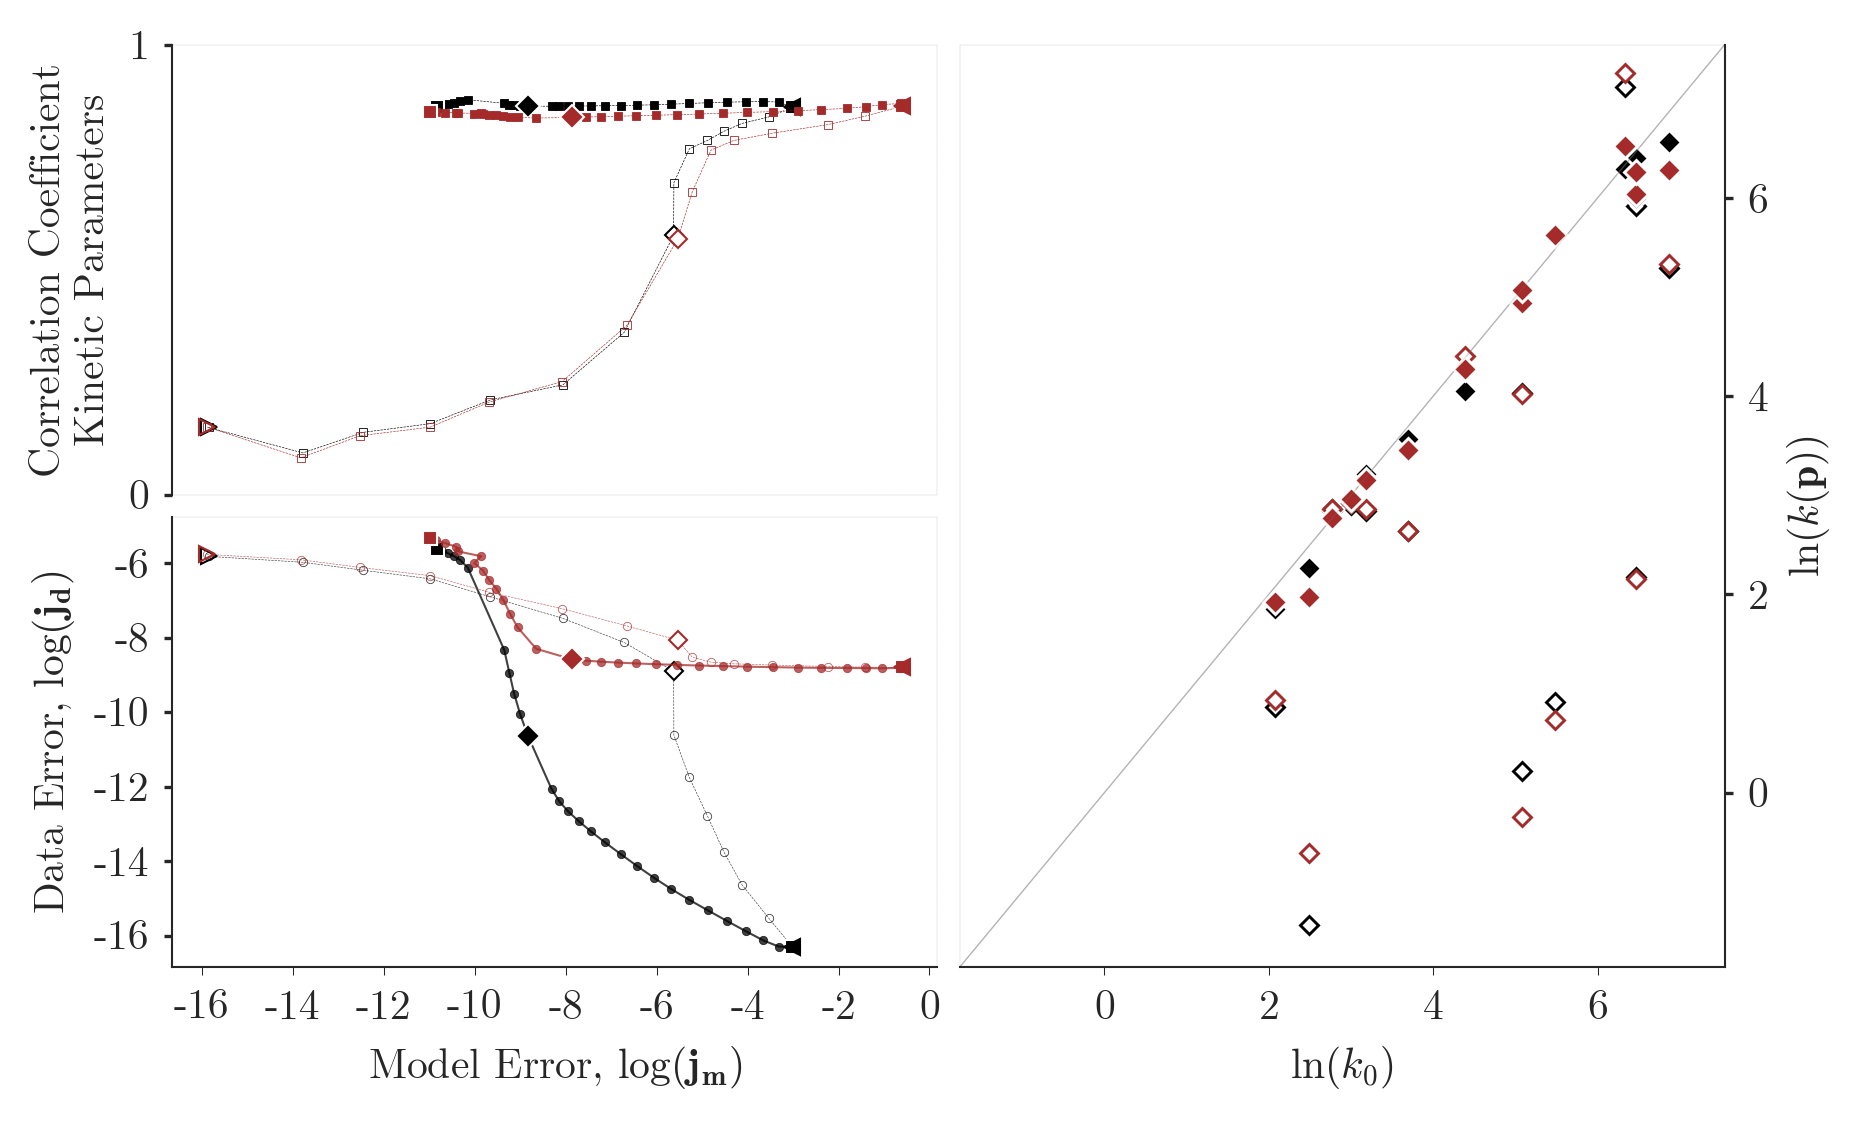

In [34]:
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.major.bottom'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.left'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.major.right'] = True
mpl.rcParams['xtick.major.size'] = 2.
mpl.rcParams['xtick.major.width'] = .25
mpl.rcParams['ytick.major.size'] = 2.

mpl.rcParams.update({'font.family':'CMU Serif'})
#mpl.rcParams.update({'font.family':'Roboto'})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'mathtext.fallback_to_cm':True})
mpl.rcParams.update({'font.size':10})
mpl.rcParams.update({'axes.unicode_minus':False})
mpl.rcParams.update({'text.usetex':False})
mpl.rcParams.update({'legend.fontsize': 8.,
          'legend.handlelength': 1})
fs=12.

mpl.rcParams.update({   'figure.titlesize' : fs,
                        })
mpl.rcParams.update({   'axes.titlesize' : fs*10/12.,
                        'axes.labelsize' : fs*10/12.,
                        'lines.linewidth' : 1,
                        'lines.markersize' : fs*10/12.,
                        'xtick.labelsize' : fs*10/12.,
                        'ytick.labelsize' : fs*10/12.})
mpl.rcParams.update({'legend.handletextpad':.4,
                     'legend.handlelength':.6,
                      'legend.columnspacing':.5,
                      'legend.borderaxespad':.5,
                      'legend.fontsize' : fs*10/12.})
mpl.rcParams['axes.linewidth'] = 0.75 #set the value globally

%matplotlib inline

fig = plt.figure(figsize=[6,2*2.75],dpi=300)

# Sizes are in inches.
dx = 2.55
dy = 1.5

horiz = [Size.Fixed(dx), Size.Fixed(0.075)]*2
vert = [Size.Fixed(dy), Size.Fixed(0.075)]*2

rect = (0.01,0.01,0.02,0.02)
# Divide the axes rectangle into a grid with sizes specified by horiz * vert.
divider = Divider(fig, rect, horiz, vert, aspect=False)

# The rect parameter will actually be ignored and overridden by axes_locator.
axs = []
axs += [fig.add_axes(rect, axes_locator=divider.new_locator(nx=0, ny=0))]
axs += [fig.add_axes(rect, axes_locator=divider.new_locator(nx=0, ny=2))]
axs += [fig.add_axes(rect, axes_locator=divider.new_locator(nx=2,ny=0, ny1=3))]
axs[0].get_shared_x_axes().join(axs[0], axs[1])
       
ax  = axs[0]
ax2 = axs[1]
axp  = axs[2]
mkm = 3
addons = ['_alpha17sens']#,'_alpha3opt']
ends = ['sc','vwn']
for addon in addons:
    for end, (c2,cinit, cmid, cfinal), Lmid  in zip(ends,[['C0','black','black','black'],['C0','brown','brown','brown']],[14,14]):
        s = 'trainer_inv{}_{}{}_sim'.format(end,mkm,addon)
        _L = __results__[s]['cv'][5:-7,:]
        m = __results__[s]['mpars'][5:-7,0,:].copy()
        its = __results__[s]['iter']
        _L = jnp.hstack((_L[:,:1],jnp.log(_L[:,1:])))
        mu_m, std_m = [_(m,axis=1) for _ in (jnp.mean,jnp.std)]
        #m_ = m/jnp.linalg.norm(m,axis=1).reshape(-1,1)
        m_ = (m-mu_m.reshape(-1,1))/std_m.reshape(-1,1)
        p = pars[mkm]['kijnpars'].copy()
        mu_p, std_p = [_(p) for _ in (jnp.mean,jnp.std)]
        p_ = (p-mu_p)/std_p
        r = m_.dot(p_)/len(p_)
        p1 = p_.copy()
        m1 = m_.copy()
        uq = jnp.unique(_L[:,0])
        pos, = jnp.where(jnp.diff(jnp.log(_L[:,0]))**-2*(jnp.diff(_L[:,2])**2+jnp.diff(_L[:,1])**2)<7)
        _L = _L[pos,:]
        _r = r[pos]
        _m = m[pos,:]
        _its = its[pos]
        _pts_c   = jnp.hstack((_L,_r[:,jnp.newaxis]))
        for L_, r_,m_,its_, pts_c, [n0,nmid,nf], custom in zip([_L[:Lmid+1,:],_L[Lmid:,:]],
                                   [_r[:Lmid+1],_r[Lmid:]],
                                   [_m[:Lmid+1,:],_m[Lmid:,:]],
                                   [_its[:Lmid+1],_its[Lmid:]],
                                   [_pts_c[:Lmid+1,:],_pts_c[Lmid:,:]],
                                   [[0,7,-1],[0,17,-1]],
                                   [['>','o','None','--',.15,2,'white',cfinal,3],['<','.',cfinal,'-',0.5,4,cfinal,'white',4]]):
            print(n0,nmid,nf)
            pts_c = jnp.array(pts_c)
            ax.plot(pts_c[:,1],pts_c[:,2],custom[3],alpha=0.75,lw=custom[4],marker=custom[1],c=cfinal,mec=cfinal,ms=custom[5],mfc=custom[2],mew=0.2)
            ax2.plot(pts_c[:,1],pts_c[:,3],custom[3],c=cfinal,linestyle='--',marker='s',ms=2,lw=0.15,mec=cfinal,mfc=custom[2],mew=0.2)
            ax.plot(pts_c[n0,1],pts_c[n0,2],marker=custom[0],c=cinit,ms=4,mew=.5,mfc=custom[2])
            ax2.plot(pts_c[n0,1],pts_c[n0,3],marker=custom[0],c=cinit,ms=4,mew=.5,mfc=custom[2])
            #ax.plot(pts_c[0,1],pts_c[0,2],marker='o',markerfacecolor='None',ms=3,mew=0.5,mec=cinit)
            ax.plot(pts_c[nmid,1],pts_c[nmid,2],marker='D',c=cmid,ms=custom[8],mfc=custom[6],mec=custom[7],mew=.5)
            ax2.plot(pts_c[nmid,1],pts_c[nmid,3],marker='D',c=cmid,ms=custom[8],mfc=custom[6],mec=custom[7],mew=.5)
            #ax.plot(pts_c[4,1],pts_c[4,2],marker='*',markerfacecolor='None',ms=5,mew=0.5,mec=cmid)
            ax.plot(pts_c[nf,1],pts_c[nf,2],marker='s',c=cfinal,ms=3.5,mec='white',mew=.5)
            ax2.plot(pts_c[nf,1],pts_c[nf,3],marker='s',c=cfinal,ms=3.5,mec='white',mew=.5)
            pref = jnp.log(pars[mkm]['kijnpars'])
            pi   = m_[n0,:]
            pmid = m_[nmid,:]
            pf   = m_[nf,:]
            axp.plot(pref,pmid,linestyle='',marker='D',c=cfinal,ms=custom[8],mfc=custom[6],mec=custom[7],mew=.7)
            pf   = jnp.exp(__results__[s]['mpars'][-4500][0])

            bounds = list(axp.get_xlim())+list(axp.get_ylim())
            newbounds = [min(bounds),max(bounds)]   
            Ls = (newbounds[-1]-newbounds[0])*1.05
            axp.plot([newbounds[0],newbounds[0]+Ls],[newbounds[0],newbounds[0]+Ls],'-',lw=0.3,alpha=0.2,color='grey')
            axp.set_xlim(newbounds)
            axp.set_ylim(newbounds)
            [i.set_linewidth(0.5)  for ax in axs for i in ax.spines.values()]
            [i.set_linewidth(0.5)  for ax in [ax2] for i in ax.spines.values()]

            ax.set_ylabel('Data Error, $\log(\mathbf{j_d})$')
            ax.set_xlabel('Model Error, $\log(\mathbf{j_m})$')
            ax2.set_ylabel('Correlation Coefficient\nKinetic Parameters')

            #plt.tight_layout()
            

axs[0].yaxis.set_ticks_position('left')
axs[0].xaxis.set_ticks_position('bottom')
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].yaxis.set_minor_locator(AutoMinorLocator(10))
axs[1].tick_params(which='minor', width=2)
axs[0].spines['top'].set_linewidth(0.025)
axs[0].spines['top'].set_linestyle("dashed")
axs[0].spines['right'].set_linewidth(0.025)
axs[0].spines['right'].set_linestyle("dashed")
axs[1].spines['top'].set_linewidth(0.025)
axs[1].spines['top'].set_linestyle("dashed")
axs[1].spines['right'].set_linewidth(0.025)
axs[1].spines['right'].set_linestyle("dashed")
axs[1].spines['bottom'].set_linewidth(0.025)
axs[1].spines['bottom'].set_linestyle("dashed")
axs[2].spines['top'].set_linewidth(0.025)
axs[2].spines['top'].set_linestyle("dashed")
axs[2].spines['left'].set_linewidth(0.025)
axs[2].spines['left'].set_linestyle("dashed")

axs[2].set_ylabel('$\ln(k(\mathbf{p}))$')
axs[2].set_xlabel('$\ln(k_0)$')


axs[2].tick_params(labelbottom=True, labelright=True)
axs[2].yaxis.tick_right()
axs[2].yaxis.set_label_position("right")
axs[1].tick_params(bottom=False,top=False,labelbottom=False, labeltop=False,labelleft=True,labelright=False)
axs[2].tick_params(top=False,labelbottom=True, labeltop=False,labelleft=False,labelright=True)
axs[1].yaxis.set_label_position("left")
axs[1].yaxis.tick_left()
axs[1].set_ylim([-0.00,1.00])
plt.savefig('latex_reg/figures/pareto_source.pdf',dpi=300,bbox_inches='tight')        
plt.savefig('latex_reg/figures/pareto_source.svg',dpi=1000,bbox_inches='tight')     

#### Summary model `3`, $SQ+n$

0 diff_latent
1 diff_obs


Text(0.5, 1.2, 'States Derivatives')

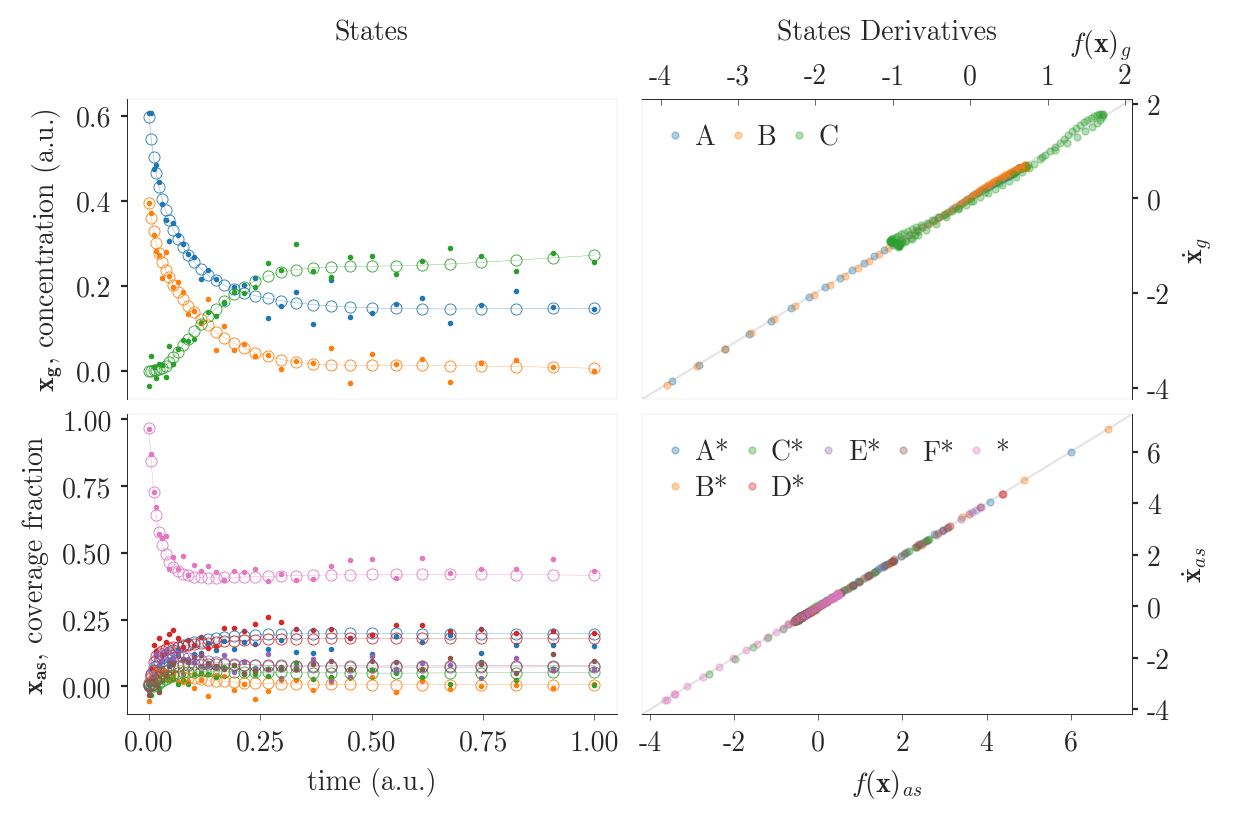

In [21]:
addon = '_alpha13'
mode = 'invvwn'
mkm  = 3
label = 'trainer_{}_{}_alpha13_sim'.format(mode,mkm)
plot = ['state_obs','diff_obs','state_latent','diff_latent']
_p = plot[0]
_bc = 0
d = __results__[label][_bc]
t  = d['data']['t']

mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.major.bottom'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.left'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.major.right'] = True
mpl.rcParams['xtick.major.size'] = 2.
mpl.rcParams['xtick.major.width'] = .25
mpl.rcParams['ytick.major.size'] = 2.

mpl.rcParams.update({'font.family':'CMU Serif'})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'mathtext.fallback_to_cm':True})
mpl.rcParams.update({'font.size':10})
mpl.rcParams.update({'axes.unicode_minus':False})
mpl.rcParams.update({'text.usetex':False})
mpl.rcParams.update({'legend.fontsize': 8.,
          'legend.handlelength': 1})
fs=12.

mpl.rcParams.update({   'figure.titlesize' : fs,
                        })
mpl.rcParams.update({   'axes.titlesize' : fs*10/12.,
                        'axes.labelsize' : fs*10/12.,
                        'lines.linewidth' : 1,
                        'lines.markersize' : fs*10/12.,
                        'xtick.labelsize' : fs*10/12.,
                        'ytick.labelsize' : fs*10/12.})
mpl.rcParams.update({'legend.handletextpad':.4,
                     'legend.handlelength':.6,
                      'legend.columnspacing':.5,
                      'legend.borderaxespad':.5,
                      'legend.fontsize' : fs*10/12.})
mpl.rcParams['axes.linewidth'] = 0.75 #set the value globally

%matplotlib inline

fig = plt.figure(figsize=(7, 7),dpi=200)

# Sizes are in inches.

dx = 2.45
dy = 1.5

horiz = [Size.Fixed(dx), Size.Fixed(0.125)]*2
vert = [Size.Fixed(dy), Size.Fixed(0.075)]*2

rect = (0.01,0.01,0.02,0.02)
# Divide the axes rectangle into a grid with sizes specified by horiz * vert.
divider = Divider(fig, rect, horiz, vert, aspect=False)

# The rect parameter will actually be ignored and overridden by axes_locator.

axs = [[[] for i in range(2)] for j in range(2)]
matching_dict = dict()
delta = 1
for j in range(2):
    for i in range(2):
        axs[j][i] = fig.add_axes(rect, axes_locator=divider.new_locator(nx=i*2, ny=j*2))

        ax = axs
    
ls = []
legs = [['A*', 'B*','C*','D*','E*','F*','*'],['A','B','C']]
for i, _p in enumerate([plot[3],plot[1]]):
    try:
        print(i,_p)
        ds0 = d['data'][_p][0]
        ds1 = d['data'][_p][1]
        ds0 , ds1 = [(ds-ds.mean(axis=0))/ds.std(axis=0) for ds in [ds0,ds1]]
        ls = axs[i][1].plot(ds0,ds1,'.',ms=5,mew=0.5,alpha=0.35)
        #leg1 = axs[i][1].legend(iter(ls), legs[i],ncol=5,loc=[0.05,0.75],labelspacing=0.35)
        leg1 = axs[i][1].legend(iter(ls), legs[i],ncol=5,labelspacing=0.35)
        bounds = list(axs[i][1].get_xbound())+list(ax[i][1].get_ybound())
        newbounds = [min(bounds)-0.025,max(bounds)+0.025]
        L = 10
        ax[i][1].plot([-L,L],[-L,L],'-',lw=0.8,alpha=0.2,color='grey')
        ax[i][1].set_xlim(newbounds)
        ax[i][1].set_ylim(newbounds)
    except:
        print('Missing',(i,_p))
    
n = 3
    
i = 1
t_ = t[::n]
l1 = axs[i][0].plot(t_,d['raw_data']['state'][1][::n,:3],'.',ms=2,lw=0.05)
l2 = axs[i][0].plot(t_,d['raw_data']['state'][0][::n,:3],'o-',lw=0.1,ms=4,markerfacecolor='None',markeredgecolor='black',markeredgewidth=0.3)

fix_color(l1,l2)
legs = ['A', 'B','C']
#axs[1][0].legend(iter(l1+l2), legs+[_+'$_{_{NN}}$' for _ in legs],ncol=2,loc=[0.6,0.55],labelspacing=0.5)


t_ = t[::n]
l1 = axs[0][0].plot(t_,d['raw_data']['state'][1][::n,3:],'.',ms=2,lw=0.05)
l2 = axs[0][0].plot(t_,d['raw_data']['state'][0][::n,3:],'o-',lw=0.1,ms=4,markerfacecolor='None',markeredgecolor='black',markeredgewidth=0.3)
fix_color(l1,l2)
legs = ['A*', 'B*','C*','D*','E*','F*','*']

axs[0][0].set_xlabel('time (a.u.)')#,ha='right',x=1)
axs[1][0].set_ylabel('$\mathbf{x_{g}}$, concentration (a.u.)')
axs[1][0].tick_params(labelbottom=False, labelleft=True)
axs[1][1].tick_params(labelbottom=False, labeltop=True,labelleft=False,labelright=True)
#axs[1][1].set_xlabel('time (a.u.)')
axs[0][0].set_ylabel('$\mathbf{x_{as}}$, coverage fraction')
#axs[0][0].set_xlabel('$f(\mathbf{x})$')
#axs[0][0].set_ylabel('$\mathbf{\.x}$')
axs[1][1].set_xlabel('$f(\mathbf{x})_g$',ha='right',x=1)
axs[1][1].xaxis.set_label_position('top')
axs[1][1].set_ylabel('$\mathbf{\.x}_g$')
axs[1][1].yaxis.set_label_position("right")
axs[1][1].yaxis.tick_right()
axs[0][1].set_xlabel('$f(\mathbf{x})_{as}$')
axs[0][1].set_ylabel('$\mathbf{\.x}_{as}$')
axs[0][1].yaxis.set_label_position("right")
axs[0][1].yaxis.tick_right()
axs[0][0].set_xlim([-0.05,1.05])

for _ in axs:
    for ax in _:
        [i.set_linewidth(0.35)  for i in ax.spines.values()];
        plt.setp(ax.get_xticklabels(), visible=True)
        #plt.setp(ax.get_xticks(), visible=True)

axs[1][0].spines['bottom'].set_linestyle("dashed")
axs[1][0].spines['bottom'].set_linewidth(0.025)
axs[1][0].spines['top'].set_linestyle("dashed")
axs[1][0].spines['top'].set_linewidth(0.025)
axs[1][0].spines['right'].set_linestyle("dashed")
axs[1][0].spines['right'].set_linewidth(0.025)

axs[0][0].spines['top'].set_linestyle("dashed")
axs[0][0].spines['top'].set_linewidth(0.025)
axs[0][0].spines['right'].set_linestyle("dashed")
axs[0][0].spines['right'].set_linewidth(0.025)


axs[1][0].yaxis.set_ticks_position('left')
axs[1][0].xaxis.set_ticks_position('bottom')
axs[1][0].set_xlim(axs[0][0].get_xlim())
axs[1][0].set_xticks([])

axs[0][0].xaxis.set_ticks_position('bottom')
axs[0][0].yaxis.set_ticks_position('left')
axs[0][0].xaxis.set_label_position('bottom')

axs[0][1].yaxis.set_ticks_position('right')
axs[0][1].xaxis.set_ticks_position('bottom')

axs[1][1].yaxis.set_ticks_position('right')
axs[1][1].xaxis.set_ticks_position('top')
axs[1][1].xaxis.set_label_position('top')
axs[0][1].yaxis.set_ticks_position('right')
axs[0][1].xaxis.set_ticks_position('bottom')
axs[1][1].tick_params(axis='x',direction="in")

axs[1][1].spines['bottom'].set_linestyle("dashed")
axs[1][1].spines['bottom'].set_linewidth(0.025)
axs[1][1].spines['left'].set_linestyle("dashed")
axs[1][1].spines['left'].set_linewidth(0.025)
axs[0][1].spines['top'].set_linestyle("dashed")
axs[0][1].spines['top'].set_linewidth(0.025)
axs[0][1].spines['left'].set_linestyle("dashed")
axs[0][1].spines['left'].set_linewidth(0.025)

axs[1][1].xaxis.set_major_locator(plt.MaxNLocator(8,integer=True))
axs[1][1].yaxis.set_major_locator(plt.MaxNLocator(6,integer=True))
axs[0][1].xaxis.set_major_locator(plt.MaxNLocator(8,integer=True))
axs[0][1].yaxis.set_major_locator(plt.MaxNLocator(6,integer=True))

axs[1][0].text(.5,1.2,'States',
    horizontalalignment='center',
    transform=axs[1][0].transAxes,
    fontsize=10)

axs[1][1].text(.5,1.2,'States Derivatives',
    horizontalalignment='center',
    transform=axs[1][1].transAxes,
    fontsize=10)

#plt.savefig('latex/figures/inv_noise_example.pdf',dpi=300,bbox_inches='tight')

#### Parameter Correlation Plot Source

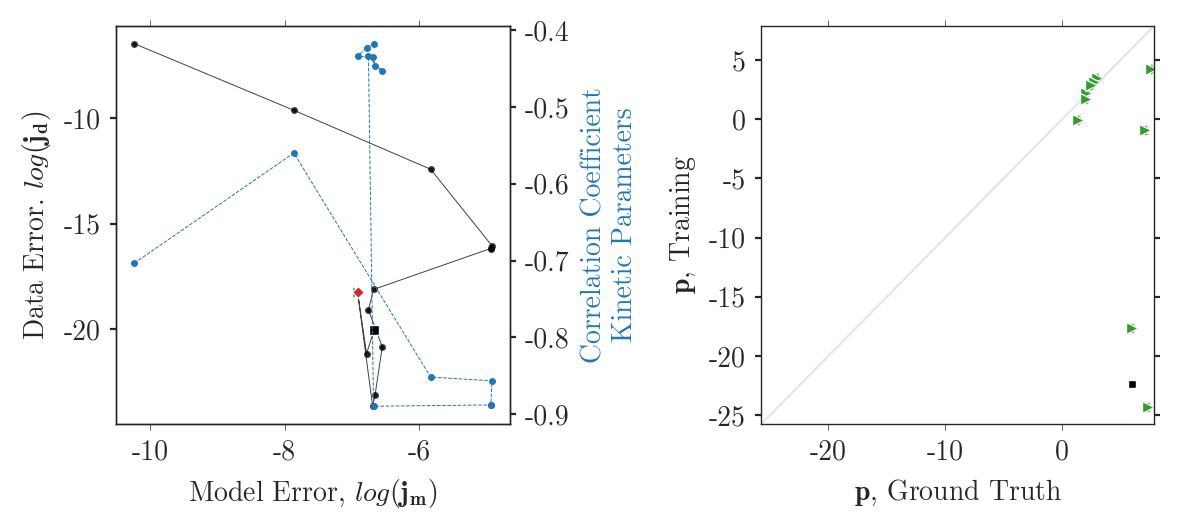

In [22]:
fig, axs = plt.subplots(1,2,figsize=[6,2.75],dpi=200)
ax  = axs[0]
ax2 = ax.twinx()
axp  = axs[1]
mkm = 2
addons = ['_alpha13']#,'_alpha3opt']
ends = ['']
c2 = 'C0'
cinit = 'C2'
cmid  = 'C3'
cfinal = 'black'
for addon in addons:
    for end in ends:

        s = 'trainer_inv{}_{}{}_sim'.format(end,mkm,addon)
        L = __results__[s]['cv'][:-2,:]
        its = __results__[s]['iter']
        L = jnp.hstack((L[:,:1],jnp.log(L[:,1:])))
        m = __results__[s]['mpars'][:,0,:].copy()
        m_ = m/jnp.linalg.norm(m,axis=1).reshape(-1,1)
        p = pars[mkm]['kijnpars'].copy()
        p = p/jnp.linalg.norm(p)
        r = m_.dot(p)
        uq = jnp.unique(L[:,0])
        pos = jnp.arange(len(L))#pos = [jnp.where(L[:,0]==u)[0][-1] for u in uq]
        L_ = L[pos,:]
        r_ = r[pos]
        m_ = m[pos,:]
        its_ = its[pos]
        pts_c   = jnp.hstack((L_,r_[:,jnp.newaxis]))

        n0   = -3
        nmid = -3
        nf   = -1
            
        pts_c = jnp.array(pts_c)
        ax.plot(pts_c[:,1],pts_c[:,2],'-',alpha=0.75,lw=.35,marker='.',c='black',ms=3)
        ax2.plot(pts_c[:,1],pts_c[:,3],c=c2,linestyle='--',marker='.',ms=3,lw=0.35)
        ax.plot(pts_c[n0,1],pts_c[n0,2],marker='>',c=cinit,ms=4,mec='white',mew=.5)
        ax.plot(pts_c[nmid,1],pts_c[nmid,2],marker='D',c=cmid,ms=3,mec='white',mew=.5)
        ax.plot(pts_c[nf,1],pts_c[nf,2],marker='s',c=cfinal,ms=3.5,mec='white',mew=.5)

        pref = jnp.log(pars[mkm]['kijnpars'])
        pi   = m_[n0,:]
        pmid = m_[nmid,:]
        pf   = m_[nf,:]
        axp.plot(pref,pf,linestyle='',marker='s',c=cfinal,ms=3,mec='white',mew=.5)
        axp.plot(pref,pmid,linestyle='',marker='D',c=cmid,ms=3,mec='white',mew=.5)
        axp.plot(pref,pi,linestyle='',marker='>',c=cinit,ms=4,mec='white',mew=.5)
        pf   = jnp.exp(__results__[s]['mpars'][-4500][0])

        bounds = list(axp.get_xlim())+list(axp.get_ylim())
        newbounds = [min(bounds),max(bounds)]   
        Ls = (newbounds[-1]-newbounds[0])*1.05
        axp.plot([newbounds[0],newbounds[0]+Ls],[newbounds[0],newbounds[0]+Ls],'-',lw=0.8,alpha=0.2,color='grey')
        axp.set_xlim(newbounds)
        axp.set_ylim(newbounds)
        [i.set_linewidth(0.5)  for ax in axs for i in ax.spines.values()]
        [i.set_linewidth(0.5)  for ax in [ax2] for i in ax.spines.values()]
        
        ax.set_ylabel('Data Error. $log(\mathbf{j_d})$')
        ax.set_xlabel('Model Error, $log(\mathbf{j_m})$')
        ax2.set_ylabel('Correlation Coefficient\nKinetic Parameters',c=c2)
        
        axp.set_ylabel('$\mathbf{p}$, Training')
        axp.set_xlabel('$\mathbf{p}$, Ground Truth')
        plt.tight_layout()

#### Parameter Correlation Plot Source

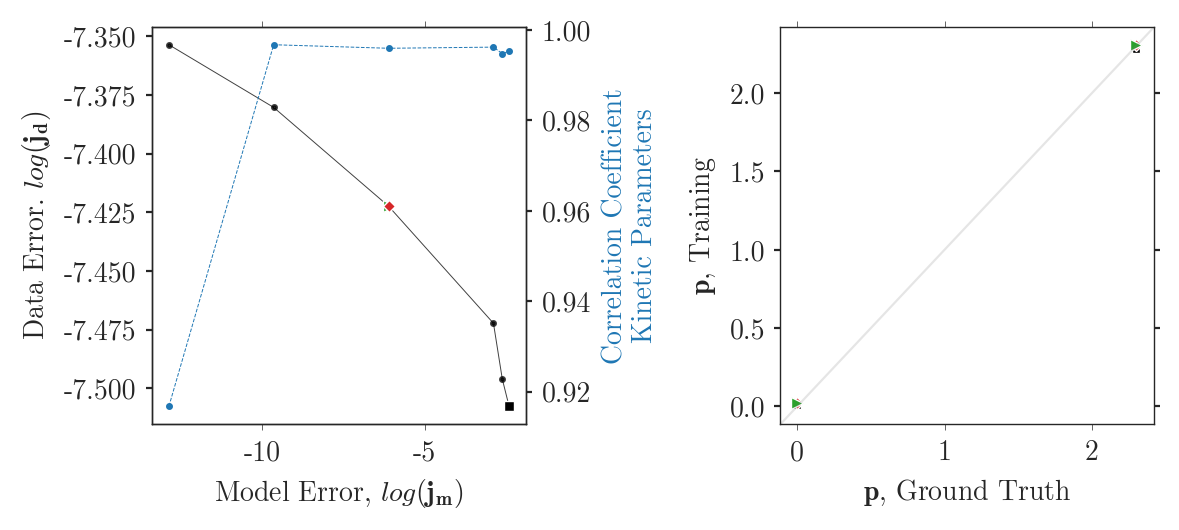

In [23]:
fig, axs = plt.subplots(1,2,figsize=[6,2.75],dpi=200)
ax  = axs[0]
ax2 = ax.twinx()
axp  = axs[1]
mkm = 0
addons = ['_alpha13']#,'_alpha3opt']
ends = ['vwn']
c2 = 'C0'
cinit = 'C2'
cmid  = 'C3'
cfinal = 'black'
for addon in addons:
    for end in ends:

        s = 'trainer_inv{}_{}{}_sim'.format(end,mkm,addon)
        L = __results__[s]['cv'][:-2,:]
        its = __results__[s]['iter']
        L = jnp.hstack((L[:,:1],jnp.log(L[:,1:])))
        m = __results__[s]['mpars'][:,0,:].copy()
        m_ = m/jnp.linalg.norm(m,axis=1).reshape(-1,1)
        p = pars[mkm]['kijnpars'].copy()
        p = p/jnp.linalg.norm(p)
        r = m_.dot(p)
        uq = jnp.unique(L[:,0])
        pos = jnp.arange(len(L))#pos = [jnp.where(L[:,0]==u)[0][-1] for u in uq]
        L_ = L[pos,:]
        r_ = r[pos]
        m_ = m[pos,:]
        its_ = its[pos]
        pts_c   = jnp.hstack((L_,r_[:,jnp.newaxis]))

        n0   = 2
        nmid = 2
        nf   = -1
        
        pts_c = jnp.array(pts_c)
        ax.plot(pts_c[:,1],pts_c[:,2],'-',alpha=0.75,lw=.35,marker='.',c='black',ms=3)
        ax2.plot(pts_c[:,1],pts_c[:,3],c=c2,linestyle='--',marker='.',ms=3,lw=0.35)
        ax.plot(pts_c[n0,1],pts_c[n0,2],marker='>',c=cinit,ms=4,mec='white',mew=.5)
        ax.plot(pts_c[nmid,1],pts_c[nmid,2],marker='D',c=cmid,ms=3,mec='white',mew=.5)
        ax.plot(pts_c[nf,1],pts_c[nf,2],marker='s',c=cfinal,ms=3.5,mec='white',mew=.5)

        pref = jnp.log(pars[mkm]['kijnpars'])
        pi   = m_[n0,:]
        pmid = m_[nmid,:]
        pf   = m_[nf,:]
        axp.plot(pref,pf,linestyle='',marker='s',c=cfinal,ms=3,mec='white',mew=.5)
        axp.plot(pref,pmid,linestyle='',marker='D',c=cmid,ms=3,mec='white',mew=.5)
        axp.plot(pref,pi,linestyle='',marker='>',c=cinit,ms=4,mec='white',mew=.5)
        
        bounds = list(axp.get_xlim())+list(axp.get_ylim())
        newbounds = [min(bounds),max(bounds)]   
        Ls = (newbounds[-1]-newbounds[0])*1.05
        axp.plot([newbounds[0],newbounds[0]+Ls],[newbounds[0],newbounds[0]+Ls],'-',lw=0.8,alpha=0.2,color='grey')
        axp.set_xlim(newbounds)
        axp.set_ylim(newbounds)
        [i.set_linewidth(0.5)  for ax in axs for i in ax.spines.values()]
        [i.set_linewidth(0.5)  for ax in [ax2] for i in ax.spines.values()]
        
        ax.set_ylabel('Data Error. $log(\mathbf{j_d})$')
        ax.set_xlabel('Model Error, $log(\mathbf{j_m})$')
        ax2.set_ylabel('Correlation Coefficient\nKinetic Parameters',c=c2)
        
        axp.set_ylabel('$\mathbf{p}$, Training')
        axp.set_xlabel('$\mathbf{p}$, Ground Truth')
        plt.tight_layout()

#### Forward Results Summary Table

In [24]:
table = dict()
tts = ['fwd','inv','invsc','invvwn']
mkms = list(range(4))
bcs = list(range(2))
addon = '_alpha13'
mkm_types = ['g','da','dc','dcs']
    
for ty in tts:
    try:
        table[ty]
    except:
        table[ty] = dict()
    for mkm in mkms: # MKMs
        for bc in bcs:
            val = __results__['trainer_{}_{}{}_gt'.format(ty,mkm,addon)][bc]['metrics'].copy()
            table[ty][(mkm_types[mkm],str(bc+1))] = dict()
            for t in val.keys():
                val_  = val[t].copy()
                val_.pop('TotalVar')
                val_  = dict(zip(tuple(zip([t]*len(val_),val_.keys())),val_.values()))
                table[ty][(mkm_types[mkm],str(bc+1))].update(val_)

pd.options.display.float_format = '{:,.3e}'.format

df = pd.DataFrame.from_dict(table['fwd'],orient='index')
df = pd.DataFrame(df,dtype=jnp.float64)
index = pd.MultiIndex.from_tuples(df.index)
df = df.reindex(index)

df0 = df.copy()
df.replace()
medians = jnp.floor(jnp.log10(abs(jnp.nanmedian(df.replace('nan',None).values,axis=0))))**0-2  # comment **0-2 to make scientific headers
style = dict()
nnames = list()

def scalefun(x,median,digits):
    try:
        y = str('{:.'+str(digits)+'e}').format(x*10**(-median))
        val, order = y.split('e')
        order = int(order)-1
        if int(order)==0:
            y = val
        elif order == -1:
            y = '0.'+''.join(val.split('.'))
        else:
            y = val+' × $10^{{{}}}$'.format(order)
        return y
    except:
        return '-'

for cname, median in zip(df.columns,medians):
    if median!=-1:
        nnames += [(cname[0],'$10^{{{}}}$ '.format(int(-median)-1)+cname[1])]
    else:
        nnames += [cname]
    digits = 3

df.columns = pd.MultiIndex.from_tuples(nnames)
for i,c in enumerate(df.columns):
    df[c] = df[c].apply(lambda x : scalefun(x,medians[i],2)) ##

display(df)

print(pd.DataFrame(df).to_latex().replace("\\textasciicircum ",'^').replace("\$",'$').replace("\{",'{').replace("\}",'}').replace('× $10','× 10$'))

Invalid nan value encountered in the output of a C++-jit/pmap function. Calling the de-optimized version.
Invalid value encountered in the output of a jit/pmap-ed function. Calling the de-optimized version.
Invalid nan value encountered in the output of a C++-jit/pmap function. Calling the de-optimized version.
Invalid value encountered in the output of a jit/pmap-ed function. Calling the de-optimized version.
Invalid nan value encountered in the output of a C++-jit/pmap function. Calling the de-optimized version.
Invalid value encountered in the output of a jit/pmap-ed function. Calling the de-optimized version.
Invalid nan value encountered in the output of a C++-jit/pmap function. Calling the de-optimized version.
Invalid value encountered in the output of a jit/pmap-ed function. Calling the de-optimized version.
Invalid nan value encountered in the output of a C++-jit/pmap function. Calling the de-optimized version.
Invalid value encountered in the output of a jit/pmap-ed function.

diff_obs                                      diff_latent                                    
            r2               MAE                MSE          r2               MAE               MSE
g   1     1.00  5.50 × $10^{-4}$   3.92 × $10^{-7}$           -                 -                 -
    2     1.00  1.79 × $10^{-5}$  4.27 × $10^{-10}$           -                 -                 -
da  1     1.00  2.51 × $10^{-3}$   1.12 × $10^{-5}$        1.00  2.97 × $10^{-3}$  1.84 × $10^{-5}$
    2     1.00  8.93 × $10^{-3}$   2.49 × $10^{-4}$        1.00  1.73 × $10^{-2}$  1.32 × $10^{-3}$
dc  1     1.00  3.30 × $10^{-3}$   2.09 × $10^{-5}$       0.999  1.26 × $10^{-2}$  4.70 × $10^{-4}$
    2     1.00  2.78 × $10^{-3}$   1.68 × $10^{-5}$        1.00  7.38 × $10^{-3}$  1.42 × $10^{-4}$
dcs 1     1.00  2.18 × $10^{-3}$   9.87 × $10^{-6}$        1.00  7.13 × $10^{-3}$  4.00 × $10^{-4}$
    2     1.00  6.89 × $10^{-4}$   8.45 × $10^{-7}$        1.00  3.33 × $10^{-3}$  3.58 × $10^{-5}$

\begin{tabular}{llllllll}
\toprule
    &   & \multicolumn{3}{l}{diff\_obs} & \multicolumn{3}{l}{diff\_latent} \\
    &   &       r2 &               MAE &                MSE &          r2 &               MAE &               MSE \\
\midrule
g & 1 &     1.00 &  5.50 × 10$^{-4}$ &   3.92 × 10$^{-7}$ &           - &                 - &                 - \\
    & 2 &     1.00 &  1.79 × 10$^{-5}$ &  4.27 × 10$^{-10}$ &           - &                 - &                 - \\
da & 1 &     1.00 &  2.51 × 10$^{-3}$ &   1.12 × 10$^{-5}$ &        1.00 &  2.97 × 10$^{-3}$ &  1.84 × 10$^{-5}$ \\
    & 2 &     1.00 &  8.93 × 10$^{-3}$ &   2.49 × 10$^{-4}$ &        1.00 &  1.73 × 10$^{-2}$ &  1.32 × 10$^{-3}$ \\
dc & 1 &     1.00 &  3.30 × 10$^{-3}$ &   2.09 × 10$^{-5}$ &       0.999 &  1.26 × 10$^{-2}$ &  4.70 × 10$^{-4}$ \\
    & 2 &     1.00 &  2.78 × 10$^{-3}$ &   1.68 × 10$^{-5}$ &        1.00 &  7.38 × 10$^{-3}$ &  1.42 × 10$^{-4}$ \\
dcs & 1 &     1.00 &  2.18 × 10$^{-3}$ &   9.87 × 10$^{-6}$ &  

#### Inverse Results Summary Table

In [25]:
tables_inv = dict()
tts = ['inv','invsc','invvwn']
mkms = list(range(4))
bcs = list(range(2))
addon = '_alpha13'
mkm_types = ['g','da','dc','dcs']
tts_dict = dict(zip(tts,[r'\obsonly',r'\semiquant',r'\semiquantn']))
    
for mkm in mkms: # MKMs
    for bc in bcs:
        for ty in tts:
            val = __results__['trainer_{}_{}{}_gt'.format(ty,mkm,addon)][bc]['metrics'].copy()
            s = (mkm_types[mkm],str(bc+1),tts_dict[ty])
            tables_inv[s] = dict()
            for t in val.keys():
                val_  = val[t].copy()
                val_.__delitem__('TotalVar')
                val_  = dict(zip(tuple(zip([t]*len(val_),val_.keys())),val_.values()))
                tables_inv[s].update(val_)
                
pd.options.display.float_format = '{:,.3e}'.format

df = pd.DataFrame.from_dict(tables_inv,orient='index')
df = pd.DataFrame(df,dtype=jnp.float64)
index = pd.MultiIndex.from_tuples(df.index)
df = df.reindex(index)

df0 = df.copy()
medians = jnp.floor(jnp.log10(abs(jnp.nanmedian(df.values,axis=0))))**0-2 # comment **0-2 to make scientific headers
style = dict()
nnames = list()

def scalefun(x,median,digits):
    if x<0:
        prep = '-'
        x = -x
    else:
        prep = ''
    try:
        y = str('{:.'+str(digits)+'e}').format(x*10**(-median))
        val, order = y.split('e')
        #print(x,val,order,median,x*10**(-median))
        order = int(order)-1
        if int(order)==0:
            y = val
        elif order == -1:
            y = '0.'+''.join(val.split('.'))
        else:
            y = val+' × $10^{{{}}}$'.format(order)
        #print(x,y,order)
        return prep+y
    except:
        return '-'

for cname, median in zip(df.columns,medians):
    if median!=-1:
        nnames += [(cname[0],'$10^{{{}}}$ '.format(jnp.int32(-median)-1)+cname[1])]
    else:
        nnames += [cname]
    digits = 2

df.columns = pd.MultiIndex.from_tuples(nnames)
for i,c in enumerate(df.columns):
    df[c] = df[c].apply(lambda x : scalefun(x,medians[i],2))
display(df.iloc[:,6:])
print(pd.DataFrame(df[df.columns[:6]]).to_latex().replace("\\textasciicircum ",'^').replace("\$",'$').replace("\{",'{').replace("\}",'}').replace('× $10','× 10$').replace('\\textbackslash ','\\'))

print(pd.DataFrame(df[df.columns[6:]]).to_latex().replace("\\textasciicircum ",'^').replace("\$",'$').replace("\{",'{').replace("\}",'}').replace('× $10','× 10$').replace('\\textbackslash ','\\'))

Invalid nan value encountered in the output of a C++-jit/pmap function. Calling the de-optimized version.
Invalid value encountered in the output of a jit/pmap-ed function. Calling the de-optimized version.
Invalid nan value encountered in the output of a C++-jit/pmap function. Calling the de-optimized version.
Invalid value encountered in the output of a jit/pmap-ed function. Calling the de-optimized version.
Invalid nan value encountered in the output of a C++-jit/pmap function. Calling the de-optimized version.
Invalid value encountered in the output of a jit/pmap-ed function. Calling the de-optimized version.
Invalid nan value encountered in the output of a C++-jit/pmap function. Calling the de-optimized version.
Invalid value encountered in the output of a jit/pmap-ed function. Calling the de-optimized version.
Invalid nan value encountered in the output of a C++-jit/pmap function. Calling the de-optimized version.
Invalid value encountered in the output of a jit/pmap-ed function.

diff_latent                                     state_latent                                    
                           r2               MAE               MSE           r2               MAE               MSE
g   1 \obsonly              -                 -                 -            -                 -                 -
      \semiquant            -                 -                 -            -                 -                 -
      \semiquantn           -                 -                 -            -                 -                 -
    2 \obsonly              -                 -                 -            -                 -                 -
      \semiquant            -                 -                 -            -                 -                 -
      \semiquantn           -                 -                 -            -                 -                 -
da  1 \obsonly           1.00  9.59 × $10^{-3}$  2.99 × $10^{-4}$        0.972  3.17 × $10^{-2}$  1.40 × $10^{-3}$
      \semiquant        0.944             0.131             0.325        0.999  1.09 × $10^{-3}$  2.30 × $10^{-6}$
      \semiquantn       0.941  7.62 × $10^{-2}$  1.90 × $10^{-2}$        0.863  1.56 × $10^{-2}$  4.79 × $10^{-4}$
    2 \obsonly           1.00  7.59 × $10^{-3}$  1.69 × $10^{-4}$        0.998  3.48 × $10^{-2}$  1.69 × $10^{-3}$
      \semiquant        0.998  7.82 × $10^{-2}$  4.47 × $10^{-2}$         1.00  1.26 × $10^{-3}$  2.23 × $10^{-6}$
      \semiquantn        1.00  4.47 × $10^{-2}$  3.37 × $10^{-3}$        0.948  1.79 × $10^{-2}$  4.15 × $10^{-4}$
dc  1 \obsonly           1.00  1.91 × $10^{-2}$  5.92 × $10^{-4}$        0.965             0.118  2.32 × $10^{-2}$
      \semiquant        0.999  2.63 × $10^{-2}$  3.50 × $10^{-3}$         1.00  6.39 × $10^{-4}$  6.21 × $10^{-7}$
      \semiquantn       0.983  5.96 × $10^{-2}$  5.93 × $10^{-3}$        0.895  2.67 × $10^{-2}$  1.29 × $10^{-3}$
    2 \obsonly          0.996  1.04 × $10^{-2}$  1.54 × $10^{-4}$        0.940             0.151  3.68 × $10^{-2}$
      \semiquant         1.00  1.13 × $10^{-2}$  4.60 × $10^{-4}$         1.00  6.64 × $10^{-4}$  6.96 × $10^{-7}$
      \semiquantn       0.988  4.08 × $10^{-2}$  3.70 × $10^{-3}$        0.988  3.24 × $10^{-2}$  2.05 × $10^{-3}$
dcs 1 \obsonly          0.975  1.87 × $10^{-2}$  8.11 × $10^{-4}$        0.374             0.146  3.84 × $10^{-2}$
      \semiquant         1.00  5.53 × $10^{-3}$  8.53 × $10^{-5}$         1.00  2.66 × $10^{-3}$  1.28 × $10^{-5}$
      \semiquantn        1.00  1.28 × $10^{-2}$  3.24 × $10^{-4}$        0.996  1.47 × $10^{-2}$  3.89 × $10^{-4}$
    2 \obsonly          0.736  1.81 × $10^{-2}$  9.85 × $10^{-4}$        0.236             0.181  5.76 × $10^{-2}$
      \semiquant         1.00  9.30 × $10^{-3}$  2.51 × $10^{-4}$         1.00  2.68 × $10^{-3}$  1.30 × $10^{-5}$
      \semiquantn       0.998  2.11 × $10^{-2}$  1.44 × $10^{-3}$        0.989  1.06 × $10^{-2}$  1.45 × $10^{-4}$

\begin{tabular}{lllllllll}
\toprule
    &   &             & \multicolumn{3}{l}{diff\_obs} & \multicolumn{3}{l}{state\_obs} \\
    &   &             &                r2 &               MAE &               MSE &        r2 &               MAE &                MSE \\
\midrule
g & 1 & \obsonly &              1.00 &  1.24 × 10$^{-3}$ &  4.36 × 10$^{-6}$ &      1.00 &  2.35 × 10$^{-5}$ &  7.13 × 10$^{-10}$ \\
    &   & \semiquant &              1.00 &  1.24 × 10$^{-3}$ &  4.36 × 10$^{-6}$ &      1.00 &  2.35 × 10$^{-5}$ &  7.13 × 10$^{-10}$ \\
    &   & \semiquantn &             0.965 &             0.104 &  2.14 × 10$^{-2}$ &     0.997 &  5.32 × 10$^{-3}$ &   4.69 × 10$^{-5}$ \\
    & 2 & \obsonly &              1.00 &  1.35 × 10$^{-4}$ &  4.13 × 10$^{-8}$ &      1.00 &  2.95 × 10$^{-6}$ &  1.14 × 10$^{-11}$ \\
    &   & \semiquant &              1.00 &  1.35 × 10$^{-4}$ &  4.13 × 10$^{-8}$ &      1.00 &  2.95 × 10$^{-6}$ &  1.14 × 10$^{-11}$ \\
    &   & \semiquantn &  3.28 × 10$^{-2}$ &    

#### Final Paramater Parity Plot Generation

In [26]:
table

{'fwd': {('g',
   '1'): {('diff_obs',
    'r2'): DeviceArray(0.9999993, dtype=float64), ('diff_obs', 'MAE'): 0.0005503246797529554, ('diff_obs',
    'MSE'): 3.915582401696621e-07},
  ('g', '2'): {('diff_obs', 'r2'): DeviceArray(0.99999962, dtype=float64),
   ('diff_obs', 'MAE'): 1.7890034667641848e-05,
   ('diff_obs', 'MSE'): 4.274584834107998e-10},
  ('da', '1'): {('diff_obs', 'r2'): DeviceArray(0.99962591, dtype=float64),
   ('diff_obs', 'MAE'): 0.0025074404274090076,
   ('diff_obs', 'MSE'): 1.1204323549666634e-05,
   ('diff_latent', 'r2'): DeviceArray(0.99998357, dtype=float64),
   ('diff_latent', 'MAE'): 0.0029730259693124244,
   ('diff_latent', 'MSE'): 1.8387684142383412e-05},
  ('da', '2'): {('diff_obs', 'r2'): DeviceArray(0.9998766, dtype=float64),
   ('diff_obs', 'MAE'): 0.008933301277185618,
   ('diff_obs', 'MSE'): 0.00024893724831035906,
   ('diff_latent', 'r2'): DeviceArray(0.9999128, dtype=float64),
   ('diff_latent', 'MAE'): 0.0173305514353974,
   ('diff_latent', 'MSE'): 0

[0, 1]
0 0 inv [2.30258509 0.        ] [ 2.30168288e+00 -1.07749004e-03]
[0, 1]
0 2 invvwn [2.30258509 0.        ] [ 2.27625141 -0.01950046]
[0, 1, 2, 3, 4, 5]
1 0 inv [2.30258509 1.38629436 3.68887945 4.09434456 5.29831737 3.68887945] [2.40725801 1.28472605 3.90840197 3.94360987 5.38756014 3.38682535]
[6, 7]
1 0 inv [4.60517019 4.38202663] [4.41211885 4.38420187]
[0, 1, 2, 3, 4, 5]
1 1 invsc [2.30258509 1.38629436 3.68887945 4.09434456 5.29831737 3.68887945] [2.26924345 1.33093845 3.57384427 3.96040742 5.28581839 3.68186711]
[6, 7]
1 1 invsc [4.60517019 4.38202663] [4.58556417 4.38558658]
[0, 1, 2, 3, 4, 5]
1 2 invvwn [2.30258509 1.38629436 3.68887945 4.09434456 5.29831737 3.68887945] [2.07769166 1.15346523 3.6040364  3.98629204 5.1633636  3.57674802]
[6, 7]
1 2 invvwn [4.60517019 4.38202663] [4.48423106 4.34080108]
[0, 1, 2, 3, 4, 5]
2 0 inv [2.99573227 2.07944154 2.77258872 1.38629436 2.48490665 2.07944154] [ 3.44454537  2.20188071  3.17480947 -0.02154242  2.84397674  1.70022342]
[6

MAE                                                                           total
                                g                 d                 a                 c                 s  $\rho$
g   \obsonly     9.90 × $10^{-4}$                 -                 -                 -                 -    1.00
    \semiquantn  2.29 × $10^{-2}$                 -                 -                 -                 -    1.00
da  \obsonly                    -             0.161  9.76 × $10^{-2}$                 -                 -   0.991
    \semiquant                  -  5.95 × $10^{-2}$  1.16 × $10^{-2}$                 -                 -   0.999
    \semiquantn                 -             0.150  8.11 × $10^{-2}$                 -                 -   0.999
dc  \obsonly                    -             0.520                 -   1.80 × $10^{1}$                 -  -0.523
    \semiquant                  -  1.70 × $10^{-2}$                 -  7.32 × $10^{-2}$                 -    1.00
    \semiquantn                 -             0.236                 -             0.420                 -   0.996
dcs \obsonly                    -              5.06                 -   1.02 × $10^{1}$              1.90   0.205
    \semiquant                  -  4.10 × $10^{-2}$                 -             0.116  6.61 × $10^{-2}$   0.999
    \semiquantn                 -             0.110                 -             0.114  9.62 × $10^{-2}$   0.997

\begin{tabular}{llllllll}
\toprule
    &             & \multicolumn{5}{l}{MAE} &   total \\
    &             &                 g &                 d &                 a &                 c &                 s &  $\rho$ \\
\midrule
g & \obsonly &  9.90 × 10$^{-4}$ &                 - &                 - &                 - &                 - &    1.00 \\
    & \semiquantn &  2.29 × 10$^{-2}$ &                 - &                 - &                 - &                 - &    1.00 \\
da & \obsonly &                 - &             0.161 &  9.76 × 10$^{-2}$ &                 - &                 - &   0.991 \\
    & \semiquant &                 - &  5.95 × 10$^{-2}$ &  1.16 × 10$^{-2}$ &                 - &                 - &   0.999 \\
    & \semiquantn &                 - &             0.150 &  8.11 × 10$^{-2}$ &                 - &                 - &   0.999 \\
dc & \obsonly &                 - &             0.520 &                 - &   1.80 × 10$^{1}$ &                 - &  -0.523

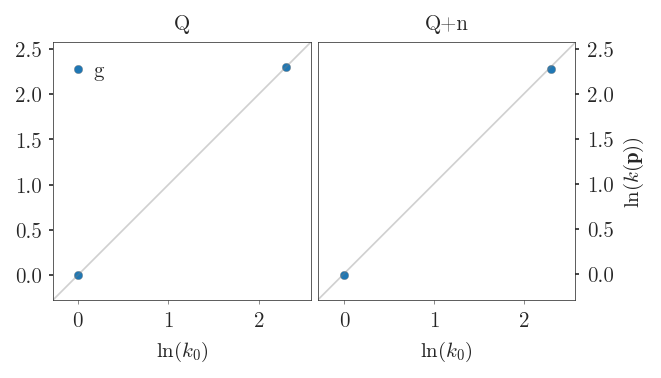

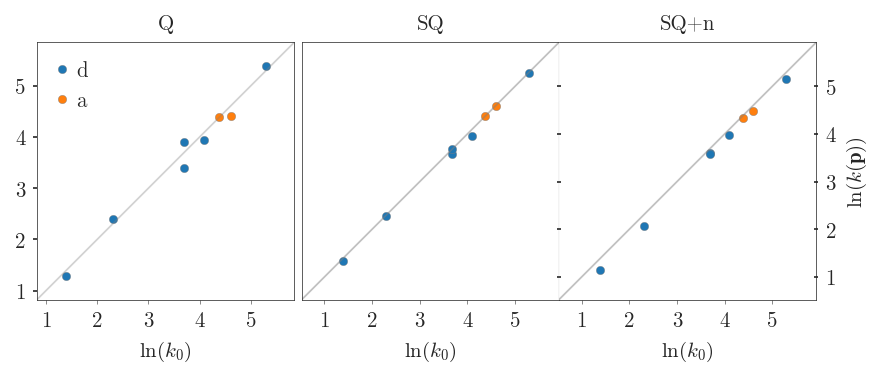

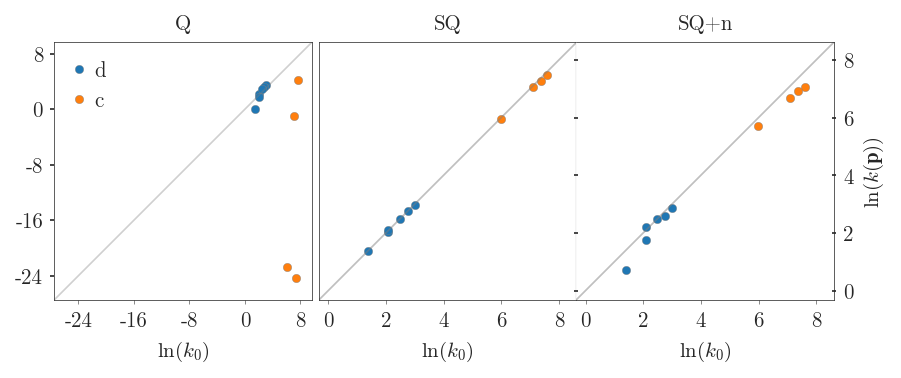

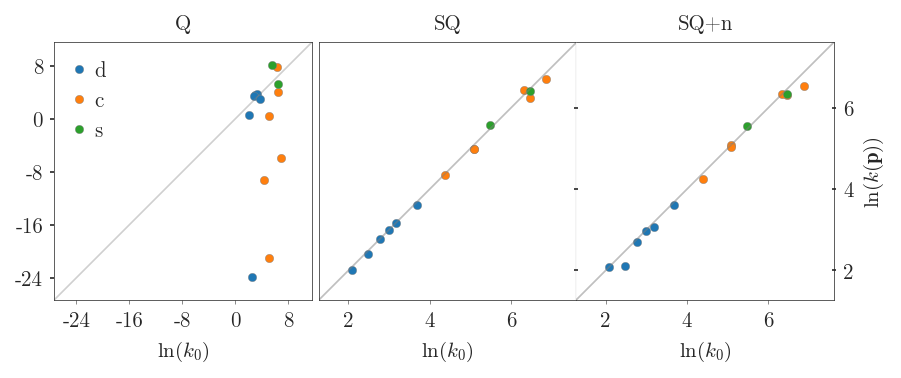

In [27]:
table = dict()
mkms = list(range(4))

addon     = '_alpha13'
mkm_types = ['g','da','dc','dcs']
tts       = ['inv','invsc','invvwn']
tts_dict = dict(zip(tts,[r'\obsonly',r'\semiquant',r'\semiquantn']))

rtype_dict = {mkm : {_:None for _ in ['g','d','a','c','s']} for mkm in mkm_types}

rtype_dict['g']['g']   = list(range(2))
rtype_dict['da']['d']  = list(range(6))
rtype_dict['da']['a']  = list(range(6,8))
rtype_dict['dc']['d']  = list(range(6))
rtype_dict['dc']['c']  = list(range(6,10))
rtype_dict['dcs']['d'] = list(range(6))
rtype_dict['dcs']['c'] = list(range(6,10))+list(range(12,14))
rtype_dict['dcs']['s'] = list(range(10,12))

scenarios = ['Q','SQ','SQ+n']
    
for a, mkm in enumerate(mkms): # MKMs
    
    fig = plt.figure(figsize=(7, 3),dpi=150)
        
    # Sizes are in inches.

    dx = 2.45*0.7
    dy = 2.45*0.7
    
    if a>0:
        horiz = [Size.Fixed(dx),Size.Fixed(0.05)]+[Size.Fixed(dx)]*2 #, Size.Fixed(0.125)
    else:
        horiz = [Size.Fixed(dx),Size.Fixed(0.05)]+[Size.Fixed(dx)]*1 #, Size.Fixed(0.125)
    vert  = [Size.Fixed(dy)]

    rect = (0.01,0.01,0.02,0.02)
    # Divide the axes rectangle into a grid with sizes specified by horiz * vert.
    divider = Divider(fig, rect, horiz, vert, aspect=False)

    axs = []
    matching_dict = dict()
    delta = 1

    for j in range([3 if a>0 else 2][0]):
        k = j if j == 0 else j+1
        axs += [fig.add_axes(rect, axes_locator=divider.new_locator(nx=k, ny=0))]

    mpars0 = jnp.log(pars[mkm]['kijnpars'])
    for n, ty in enumerate(tts):
        if a == 0  and n ==1:
            pass
        else:
            if a!=0 or n!=2:
                ax = axs[n]
            if a==0 and n==2:
                ax = axs[n-1]
                ax.set_title('{}'.format('Q+n'))     
            else:
                ax.set_title('{}'.format(scenarios[n]))     
            try:
                table[(mkm_types[mkm],tts_dict[ty])]
            except:
                table[(mkm_types[mkm],tts_dict[ty])] = dict()
            mpars  = __results__['trainer_{}_{}{}_gt'.format(ty,mkm,addon)]['mpars'][-1][0].copy()

            for rtype in rtype_dict[mkm_types[mkm]].keys():
                _range = rtype_dict[mkm_types[mkm]][rtype]
                if _range:
                    print(_range)
                    print(mkm,n,ty,mpars0[jnp.array(_range)],jnp.array(mpars)[jnp.array(_range)])
                    table[(mkm_types[mkm],tts_dict[ty])].update({('MAE',rtype):mean_absolute_error(mpars0[jnp.array(_range)],jnp.array(mpars)[jnp.array(_range)])})#,\
                                                      #   (rtype,'MAE'):mean_absolute_error(mpars0[_range],mpars[_range])})
                    ax.plot(mpars0[jnp.array(_range)],jnp.array(mpars)[jnp.array(_range)],'.',label=rtype,ms=8,mec='grey',mew=0.2)
                else:
                    table[(mkm_types[mkm],tts_dict[ty])].update({('MAE',rtype):jnp.nan})#,\
                                                     #(rtype,'MAE'):jnp.nan})
            #leg1 = axs.legend(iter(ls), legs[i],ncol=5,labelspacing=0.35)
            bounds = list(ax.get_xbound())+list(ax.get_ybound())
            newbounds = [min(bounds)-0.025,max(bounds)+0.025]
            L = 100
            ax.plot([-L,L],[-L,L],'-',lw=0.8,alpha=0.2,color='grey')
            ax.set_xlim(newbounds)
            ax.set_ylim(newbounds)
            d = jnp.hstack((mpars0[:,jnp.newaxis],jnp.array(mpars)[:,jnp.newaxis]))
            d = (d-d.mean(axis=0)[jnp.newaxis,:])/d.std(axis=0)[jnp.newaxis,:]
            rho = jnp.dot(d[:,0],d[:,1])*jnp.reciprocal(len(d))

            bounds = list(ax.get_xbound())+list(ax.get_ybound())
            delta = max(bounds)-min(bounds)
            newbounds = [min(bounds)-delta*.05,max(bounds)+delta*.05]
            L = 100
            ax.plot([-L,L],[-L,L],'-',lw=0.8,alpha=0.2,color='grey')

            [i.set_linewidth(0.35)  for i in ax.spines.values()];
            plt.setp(ax.get_xticklabels(), visible=True)

            ax.set_xlim(newbounds)
            ax.set_ylim(newbounds)
            if  n == 2 or (a==0 and n==1):
                ax.set_ylabel('$\ln(k(\mathbf{p}))$')
            ax.set_xlabel('$\ln(k_0)$')
            ax.xaxis.set_ticks_position('bottom')
            if n > 0:
                ax.yaxis.set_ticks_position('right')
                ax.yaxis.set_label_position('right')
            else:
                ax.legend()
                ax.yaxis.set_ticks_position('left')
            if n == 2 or (a==0 and n==1):
                #ax.legend()
                if a>0:
                    ax.tick_params(axis='y',left=True,direction='inout')
                    ax.spines['left'].set_linestyle("dashed")
                    ax.spines['left'].set_linewidth(0.025)
            if n == 1 and (a>0):
                plt.setp(ax.get_yticklabels(), visible=False)
                ax.spines['right'].set_linestyle("None")
                ax.spines['right'].set_linewidth(0.025)

            table[(mkm_types[mkm],tts_dict[ty])].update({('total','$\rho$'):rho})#r2_score(mpars0,mpars),\
    if a>0:
        bounds = list(axs[1].get_xbound())+list(axs[1].get_ybound())+list(axs[2].get_xbound())+list(axs[2].get_ybound())
        delta  = max(bounds)-min(bounds)
        newbounds = [min(bounds)-0.035*delta,max(bounds)+0.035*delta]
        L = 100
        for ax in axs[1:]:
            ax.plot([-L,L],[-L,L],'-',lw=0.8,alpha=0.2,color='grey')
            ax.set_xlim(newbounds)
            ax.set_ylim(newbounds)
        for ax in axs:
            ax.xaxis.set_major_locator(plt.MaxNLocator(6,integer=True))
            ax.yaxis.set_major_locator(plt.MaxNLocator(6,integer=True))
    
    plt.savefig('latex_reg/figures/inv_{}_reg.pdf'.format(mkm_types[a]),dpi=300,bbox_inches='tight')

print(table)

import pandas as pd
pd.options.display.float_format = '{:,.2e}'.format

df = pd.DataFrame.from_dict(table,orient='index')
df = pd.DataFrame(df,dtype=jnp.float64)
index = pd.MultiIndex.from_tuples(df.index)
df = df.reindex(index)

##

df0 = df.copy()
medians = jnp.floor(jnp.log10(abs(jnp.nanmedian(df.values,axis=0))))**0-2 # comment **0-2 to make scientific headers
style = dict()
nnames = list()

def scalefun(x,median,digits):
    if x<0:
        prep = '-'
        x = -x
    else:
        prep = ''
    try:
        y = str('{:.'+str(digits)+'e}').format(x*10**(-median))
        val, order = y.split('e')
        #print(x,val,order,median,x*10**(-median))
        order = int(order)-1
        if int(order)==0:
            y = val
        elif order == -1:
            y = '0.'+''.join(val.split('.'))
        else:
            y = val+' × $10^{{{}}}$'.format(order)
        #print(x,y,order)
        return prep+y
    except:
        return '-'

for cname, median in zip(df.columns,medians):
    if median!=-1:
        nnames += [(cname[0],'$10^{{{}}}$ '.format(int(-median)-1)+cname[1])]
    else:
        nnames += [cname]
    digits = 2

df.columns = pd.MultiIndex.from_tuples(nnames)
for i,c in enumerate(df.columns):
    df[c] = df[c].apply(lambda x : scalefun(x,medians[i],2)) ##

#df = df[['g','d','a','c','s','total']]    
display(df)

print(pd.DataFrame(df).to_latex().replace("\\textasciicircum ",'^').replace("\$",'$').replace("\{",'{').replace("\}",'}').replace('× $10','× 10$').replace('\\textbackslash ','\\'))

#### Summary model `2`, `inv`, $SQ$

0 diff_latent
1 diff_obs


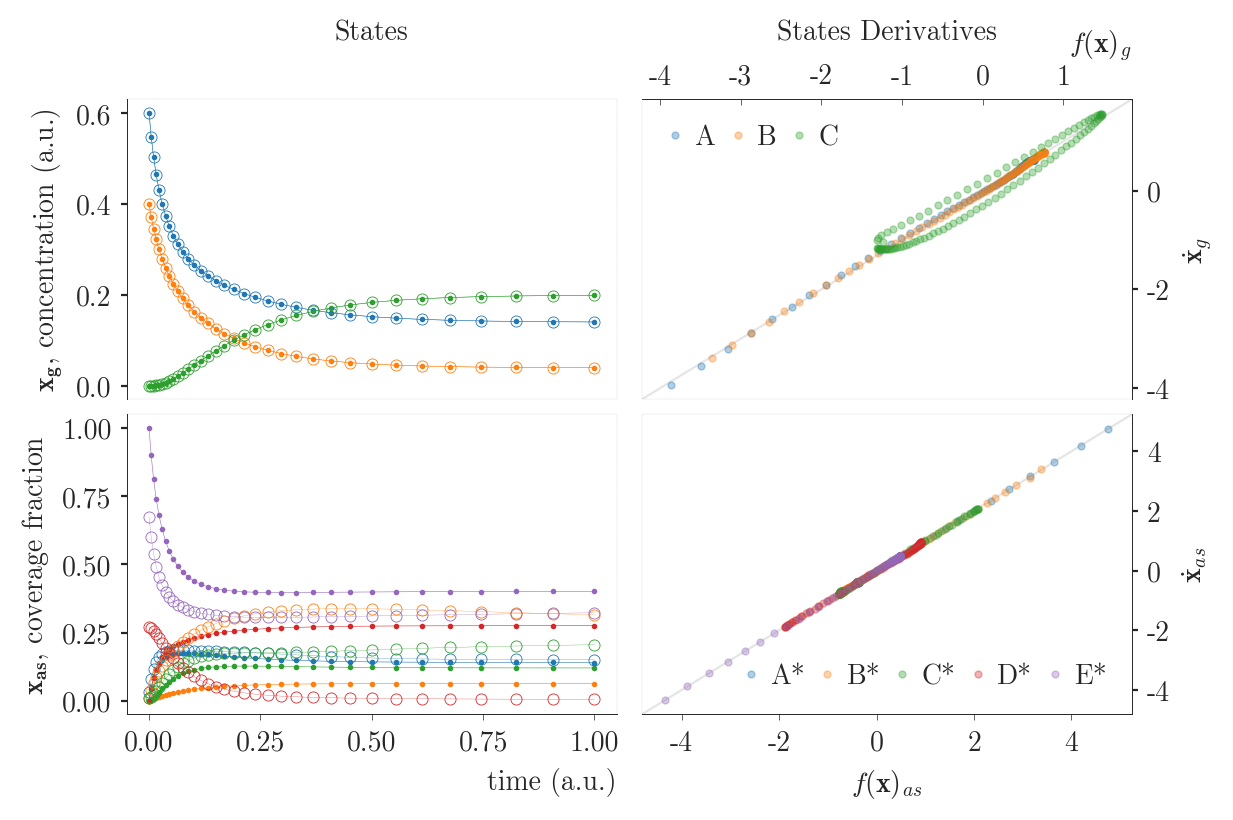

In [28]:
addon = '_alpha13'
mode = 'inv'
mkm  = 2
label = 'trainer_{}_{}_alpha13_sim'.format(mode,mkm)
plot = ['state_obs','diff_obs','state_latent','diff_latent']
_p   = plot[0]
_bc  = 0
d    = __results__[label][_bc]
t    = d['data']['t']

mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.major.bottom'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.left'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.major.right'] = True
mpl.rcParams['xtick.major.size'] = 2.
mpl.rcParams['xtick.major.width'] = .25
mpl.rcParams['ytick.major.size'] = 2.

mpl.rcParams.update({'font.family':'CMU Serif'})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'mathtext.fallback_to_cm':True})
mpl.rcParams.update({'font.size':10})
mpl.rcParams.update({'axes.unicode_minus':False})
mpl.rcParams.update({'text.usetex':False})
mpl.rcParams.update({'legend.fontsize': 8.,
          'legend.handlelength': 1})
fs=12.

mpl.rcParams.update({   'figure.titlesize' : fs,
                        })
mpl.rcParams.update({   'axes.titlesize' : fs*10/12.,
                        'axes.labelsize' : fs*10/12.,
                        'lines.linewidth' : 1,
                        'lines.markersize' : fs*10/12.,
                        'xtick.labelsize' : fs*10/12.,
                        'ytick.labelsize' : fs*10/12.})
mpl.rcParams.update({'legend.handletextpad':.4,
                     'legend.handlelength':.6,
                      'legend.columnspacing':.5,
                      'legend.borderaxespad':.5,
                      'legend.fontsize' : fs*10/12.})
mpl.rcParams['axes.linewidth'] = 0.75 #set the value globally

%matplotlib inline

fig = plt.figure(figsize=(7, 7),dpi=200)

# Sizes are in inches.

dx = 2.45
dy = 1.5

horiz = [Size.Fixed(dx), Size.Fixed(0.125)]*2
vert = [Size.Fixed(dy), Size.Fixed(0.075)]*2

rect = (0.01,0.01,0.02,0.02)
# Divide the axes rectangle into a grid with sizes specified by horiz * vert.
divider = Divider(fig, rect, horiz, vert, aspect=False)

# The rect parameter will actually be ignored and overridden by axes_locator.

axs = [[[] for i in range(2)] for j in range(2)]
matching_dict = dict()
delta = 1
for j in range(2):
    for i in range(2):
        axs[j][i] = fig.add_axes(rect, axes_locator=divider.new_locator(nx=i*2, ny=j*2))

ax = axs
    
ls = []
legs = [['A*', 'B*','C*','D*','E*','F*','*'],['A','B','C']]
for i, _p in enumerate([plot[3],plot[1]]):
    print(i,_p)
    ds0 = d['data'][_p][0]
    ds1 = d['data'][_p][1]
    ds0 , ds1 = [(ds-ds.mean(axis=0))/ds.std(axis=0) for ds in [ds0,ds1]]
    ls = axs[i][1].plot(ds0,ds1,'.',ms=5,mew=0.5,alpha=0.35)
    #leg1 = axs[i][1].legend(iter(ls), legs[i],ncol=5,loc=[0.05,0.75],labelspacing=0.35)
    leg1 = axs[i][1].legend(iter(ls), legs[i],ncol=5,labelspacing=0.35)
    bounds = list(axs[i][1].get_xbound())+list(ax[i][1].get_ybound())
    newbounds = [min(bounds)-0.025,max(bounds)+0.025]
    L = 10
    ax[i][1].plot([-L,L],[-L,L],'-',lw=0.8,alpha=0.2,color='grey')
    ax[i][1].set_xlim(newbounds)
    ax[i][1].set_ylim(newbounds)
    
n = 3
    
i = 1
t_ = t[::n]
l1 = axs[i][0].plot(t_,d['raw_data']['state'][1][::n,:3],'.-',ms=2,lw=0.2)
l2 = axs[i][0].plot(t_,d['raw_data']['state'][0][::n,:3],'o-',lw=0.1,ms=4,markerfacecolor='None',markeredgecolor='black',markeredgewidth=0.3)

fix_color(l1,l2)
legs = ['A', 'B','C']

t_ = t[::n]
l1 = axs[0][0].plot(t_,d['raw_data']['state'][1][::n,3:],'.-',ms=2,lw=0.2)
l2 = axs[0][0].plot(t_,d['raw_data']['state'][0][::n,3:],'o-',lw=0.1,ms=4,markerfacecolor='None',markeredgecolor='black',markeredgewidth=0.3)
fix_color(l1,l2)
legs = ['A*', 'B*','C*','D*','E*','F*','*']

axs[0][0].set_xlabel('time (a.u.)',ha='right',x=1)
axs[1][0].set_ylabel('$\mathbf{x_{g}}$, concentration (a.u.)')
axs[1][0].tick_params(labelbottom=False, labelleft=True)
axs[1][1].tick_params(labelbottom=False, labeltop=True,labelleft=False,labelright=True)

axs[0][0].set_ylabel('$\mathbf{x_{as}}$, coverage fraction')
axs[1][1].set_xlabel('$f(\mathbf{x})_g$',ha='right',x=1)
axs[1][1].xaxis.set_label_position('top')
axs[1][1].set_ylabel('$\mathbf{\.x}_g$')
axs[1][1].yaxis.set_label_position("right")
axs[1][1].yaxis.tick_right()
axs[0][1].set_xlabel('$f(\mathbf{x})_{as}$')
axs[0][1].set_ylabel('$\mathbf{\.x}_{as}$')
axs[0][1].yaxis.set_label_position("right")
axs[0][1].yaxis.tick_right()
axs[0][0].set_xlim([-0.05,1.05])

for _ in axs:
    for ax in _:
        [i.set_linewidth(0.35)  for i in ax.spines.values()];
        plt.setp(ax.get_xticklabels(), visible=True)

axs[1][0].spines['bottom'].set_linestyle("dashed")
axs[1][0].spines['bottom'].set_linewidth(0.025)
axs[1][0].spines['top'].set_linestyle("dashed")
axs[1][0].spines['top'].set_linewidth(0.025)
axs[1][0].spines['right'].set_linestyle("dashed")
axs[1][0].spines['right'].set_linewidth(0.025)

axs[0][0].spines['top'].set_linestyle("dashed")
axs[0][0].spines['top'].set_linewidth(0.025)
axs[0][0].spines['right'].set_linestyle("dashed")
axs[0][0].spines['right'].set_linewidth(0.025)

axs[1][0].yaxis.set_ticks_position('left')
axs[1][0].xaxis.set_ticks_position('bottom')

axs[1][0].set_xlim(axs[0][0].get_xlim())
axs[1][0].set_xticks([])

axs[0][0].xaxis.set_ticks_position('bottom')
axs[0][0].yaxis.set_ticks_position('left')
axs[0][0].xaxis.set_label_position('bottom')

axs[0][1].yaxis.set_ticks_position('right')
axs[0][1].xaxis.set_ticks_position('bottom')

axs[1][1].yaxis.set_ticks_position('right')
axs[1][1].xaxis.set_ticks_position('top')
axs[1][1].xaxis.set_label_position('top')
axs[0][1].yaxis.set_ticks_position('right')
axs[0][1].xaxis.set_ticks_position('bottom')
axs[1][1].tick_params(axis='x',direction="in")

axs[1][1].spines['bottom'].set_linestyle("dashed")
axs[1][1].spines['bottom'].set_linewidth(0.025)
axs[1][1].spines['left'].set_linestyle("dashed")
axs[1][1].spines['left'].set_linewidth(0.025)
axs[0][1].spines['top'].set_linestyle("dashed")
axs[0][1].spines['top'].set_linewidth(0.025)
axs[0][1].spines['left'].set_linestyle("dashed")
axs[0][1].spines['left'].set_linewidth(0.025)

axs[1][1].xaxis.set_major_locator(plt.MaxNLocator(8,integer=True))
axs[1][1].yaxis.set_major_locator(plt.MaxNLocator(6,integer=True))
axs[0][1].xaxis.set_major_locator(plt.MaxNLocator(8,integer=True))
axs[0][1].yaxis.set_major_locator(plt.MaxNLocator(6,integer=True))

axs[1][0].text(.5,1.2,'States',
    horizontalalignment='center',
    transform=axs[1][0].transAxes,
    fontsize=10)

axs[1][1].text(.5,1.2,'States Derivatives',
    horizontalalignment='center',
    transform=axs[1][1].transAxes,
    fontsize=10)

plt.savefig('latex_reg/figures/inv_prob.pdf',dpi=300,bbox_inches='tight')

#### Summary model `3`, `fwd`

0 diff_latent
1 diff_obs


Text(0.5, 1.2, 'States Derivatives')

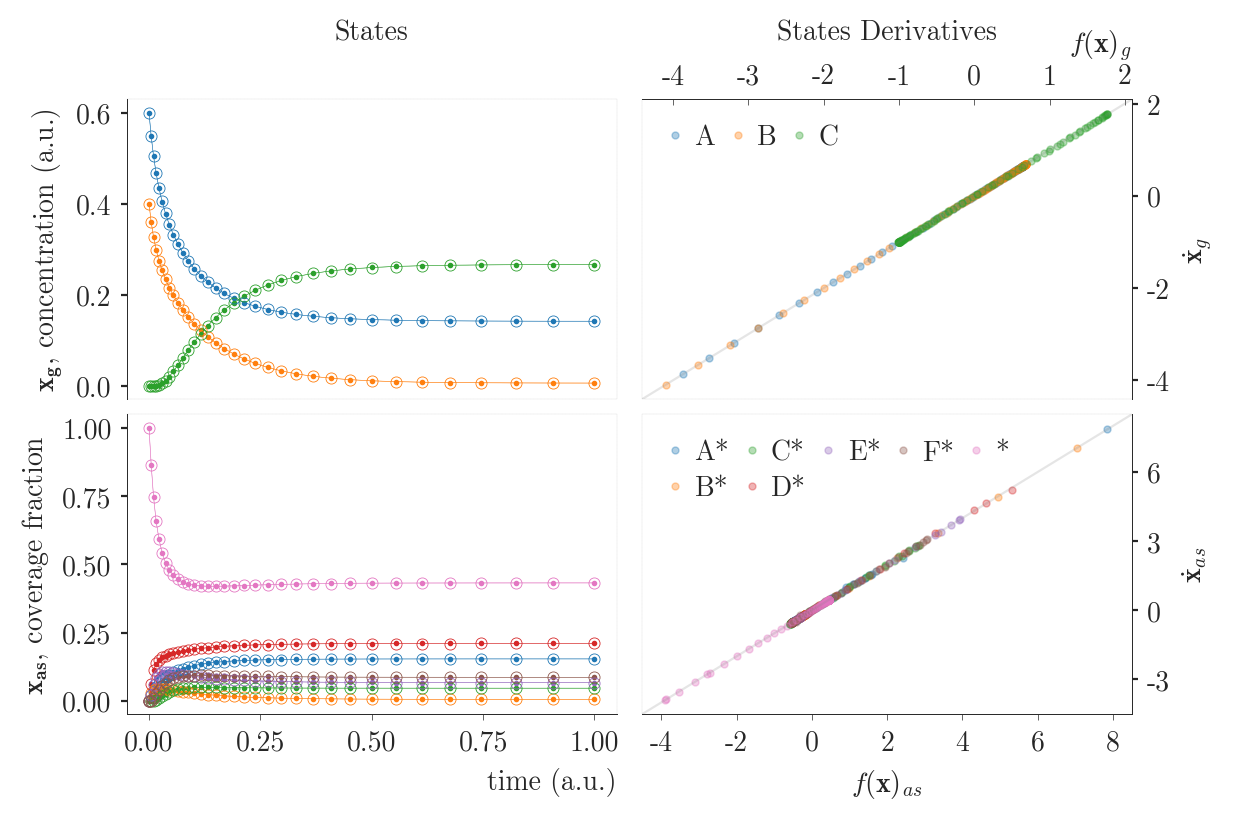

In [29]:
addon = '_alpha13'
mode = 'fwd'
mkm  = 3
label = 'trainer_{}_{}_alpha13_gt'.format(mode,mkm)
plot = ['state_obs','diff_obs','state_latent','diff_latent']
_p = plot[0]
_bc = 0
d = __results__[label][_bc]
t  = d['data']['t']

mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.major.bottom'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.left'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.major.right'] = True
mpl.rcParams['xtick.major.size'] = 2.
mpl.rcParams['xtick.major.width'] = .25
mpl.rcParams['ytick.major.size'] = 2.

mpl.rcParams.update({'font.family':'CMU Serif'})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'mathtext.fallback_to_cm':True})
mpl.rcParams.update({'font.size':10})
mpl.rcParams.update({'axes.unicode_minus':False})
mpl.rcParams.update({'text.usetex':False})
mpl.rcParams.update({'legend.fontsize': 8.,
          'legend.handlelength': 1})
fs=12.

mpl.rcParams.update({   'figure.titlesize' : fs,
                        })
mpl.rcParams.update({   'axes.titlesize' : fs*10/12.,
                        'axes.labelsize' : fs*10/12.,
                        'lines.linewidth' : 1,
                        'lines.markersize' : fs*10/12.,
                        'xtick.labelsize' : fs*10/12.,
                        'ytick.labelsize' : fs*10/12.})
mpl.rcParams.update({'legend.handletextpad':.4,
                     'legend.handlelength':.6,
                      'legend.columnspacing':.5,
                      'legend.borderaxespad':.5,
                      'legend.fontsize' : fs*10/12.})
mpl.rcParams['axes.linewidth'] = 0.75 #set the value globally

%matplotlib inline

fig = plt.figure(figsize=(7, 7),dpi=200)

# Sizes are in inches.

dx = 2.45
dy = 1.5

horiz = [Size.Fixed(dx), Size.Fixed(0.125)]*2
vert = [Size.Fixed(dy), Size.Fixed(0.075)]*2

rect = (0.01,0.01,0.02,0.02)
# Divide the axes rectangle into a grid with sizes specified by horiz * vert.
divider = Divider(fig, rect, horiz, vert, aspect=False)

# The rect parameter will actually be ignored and overridden by axes_locator.
axs = [[[] for i in range(2)] for j in range(2)]
matching_dict = dict()
delta = 1
for j in range(2):
    for i in range(2):
        axs[j][i] = fig.add_axes(rect, axes_locator=divider.new_locator(nx=i*2, ny=j*2))

ax = axs
    
ls = []
legs = [['A*', 'B*','C*','D*','E*','F*','*'],['A','B','C']]
for i, _p in enumerate([plot[3],plot[1]]):
    print(i,_p)
    ds0 = d['data'][_p][0]
    ds1 = d['data'][_p][1]
    ds0 , ds1 = [(ds-ds.mean(axis=0))/ds.std(axis=0) for ds in [ds0,ds1]]
    ls = axs[i][1].plot(ds0,ds1,'.',ms=5,mew=0.5,alpha=0.35)
    leg1 = axs[i][1].legend(iter(ls), legs[i],ncol=5,labelspacing=0.35)
    bounds = list(axs[i][1].get_xbound())+list(ax[i][1].get_ybound())
    newbounds = [min(bounds)-0.025,max(bounds)+0.025]
    L = 10
    ax[i][1].plot([-L,L],[-L,L],'-',lw=0.8,alpha=0.2,color='grey')
    ax[i][1].set_xlim(newbounds)
    ax[i][1].set_ylim(newbounds)
    
n = 3
    
i = 1
t_ = t[::n]
l1 = axs[i][0].plot(t_,d['raw_data']['state'][1][::n,:3],'.-',ms=2,lw=0.2)
l2 = axs[i][0].plot(t_,d['raw_data']['state'][0][::n,:3],'o-',lw=0.1,ms=4,markerfacecolor='None',markeredgecolor='black',markeredgewidth=0.3)

fix_color(l1,l2)
legs = ['A', 'B','C']

t_ = t[::n]
l1 = axs[0][0].plot(t_,d['raw_data']['state'][1][::n,3:],'.-',ms=2,lw=0.2)
l2 = axs[0][0].plot(t_,d['raw_data']['state'][0][::n,3:],'o-',lw=0.1,ms=4,markerfacecolor='None',markeredgecolor='black',markeredgewidth=0.3)
fix_color(l1,l2)
legs = ['A*', 'B*','C*','D*','E*','F*','*']

axs[0][0].set_xlabel('time (a.u.)',ha='right',x=1)
axs[1][0].set_ylabel('$\mathbf{x_{g}}$, concentration (a.u.)')
axs[1][0].tick_params(labelbottom=False, labelleft=True)
axs[1][1].tick_params(labelbottom=False, labeltop=True,labelleft=False,labelright=True)
axs[0][0].set_ylabel('$\mathbf{x_{as}}$, coverage fraction')
axs[1][1].set_xlabel('$f(\mathbf{x})_g$',ha='right',x=1)
axs[1][1].xaxis.set_label_position('top')
axs[1][1].set_ylabel('$\mathbf{\.x}_g$')
axs[1][1].yaxis.set_label_position("right")
axs[1][1].yaxis.tick_right()
axs[0][1].set_xlabel('$f(\mathbf{x})_{as}$')
axs[0][1].set_ylabel('$\mathbf{\.x}_{as}$')
axs[0][1].yaxis.set_label_position("right")
axs[0][1].yaxis.tick_right()
axs[0][0].set_xlim([-0.05,1.05])
for _ in axs:
    for ax in _:
        [i.set_linewidth(0.35)  for i in ax.spines.values()];
        plt.setp(ax.get_xticklabels(), visible=True)

axs[1][0].spines['bottom'].set_linestyle("dashed")
axs[1][0].spines['bottom'].set_linewidth(0.025)
axs[1][0].spines['top'].set_linestyle("dashed")
axs[1][0].spines['top'].set_linewidth(0.025)
axs[1][0].spines['right'].set_linestyle("dashed")
axs[1][0].spines['right'].set_linewidth(0.025)

axs[0][0].spines['top'].set_linestyle("dashed")
axs[0][0].spines['top'].set_linewidth(0.025)
axs[0][0].spines['right'].set_linestyle("dashed")
axs[0][0].spines['right'].set_linewidth(0.025)

axs[1][0].yaxis.set_ticks_position('left')
axs[1][0].xaxis.set_ticks_position('bottom')
axs[1][0].set_xlim(axs[0][0].get_xlim())
axs[1][0].set_xticks([])

axs[0][0].xaxis.set_ticks_position('bottom')
axs[0][0].yaxis.set_ticks_position('left')
axs[0][0].xaxis.set_label_position('bottom')

axs[0][1].yaxis.set_ticks_position('right')
axs[0][1].xaxis.set_ticks_position('bottom')

axs[1][1].yaxis.set_ticks_position('right')
axs[1][1].xaxis.set_ticks_position('top')
axs[1][1].xaxis.set_label_position('top')
axs[0][1].yaxis.set_ticks_position('right')
axs[0][1].xaxis.set_ticks_position('bottom')
axs[1][1].tick_params(axis='x',direction="in")

axs[1][1].spines['bottom'].set_linestyle("dashed")
axs[1][1].spines['bottom'].set_linewidth(0.025)
axs[1][1].spines['left'].set_linestyle("dashed")
axs[1][1].spines['left'].set_linewidth(0.025)
axs[0][1].spines['top'].set_linestyle("dashed")
axs[0][1].spines['top'].set_linewidth(0.025)
axs[0][1].spines['left'].set_linestyle("dashed")
axs[0][1].spines['left'].set_linewidth(0.025)

axs[1][1].xaxis.set_major_locator(plt.MaxNLocator(8,integer=True))
axs[1][1].yaxis.set_major_locator(plt.MaxNLocator(6,integer=True))
axs[0][1].xaxis.set_major_locator(plt.MaxNLocator(8,integer=True))
axs[0][1].yaxis.set_major_locator(plt.MaxNLocator(6,integer=True))

axs[1][0].text(.5,1.2,'States',
    horizontalalignment='center',
    transform=axs[1][0].transAxes,
    fontsize=10)

axs[1][1].text(.5,1.2,'States Derivatives',
    horizontalalignment='center',
    transform=axs[1][1].transAxes,
    fontsize=10)

#plt.savefig('latex/figures/fwd_example.pdf',dpi=300,bbox_inches='tight')
#plt.savefig('latex/figures/fwd_example.svg',dpi=300,bbox_inches='tight')

#### Summary model `3`, `inv`, $SQ+n$

0 diff_latent
1 diff_obs


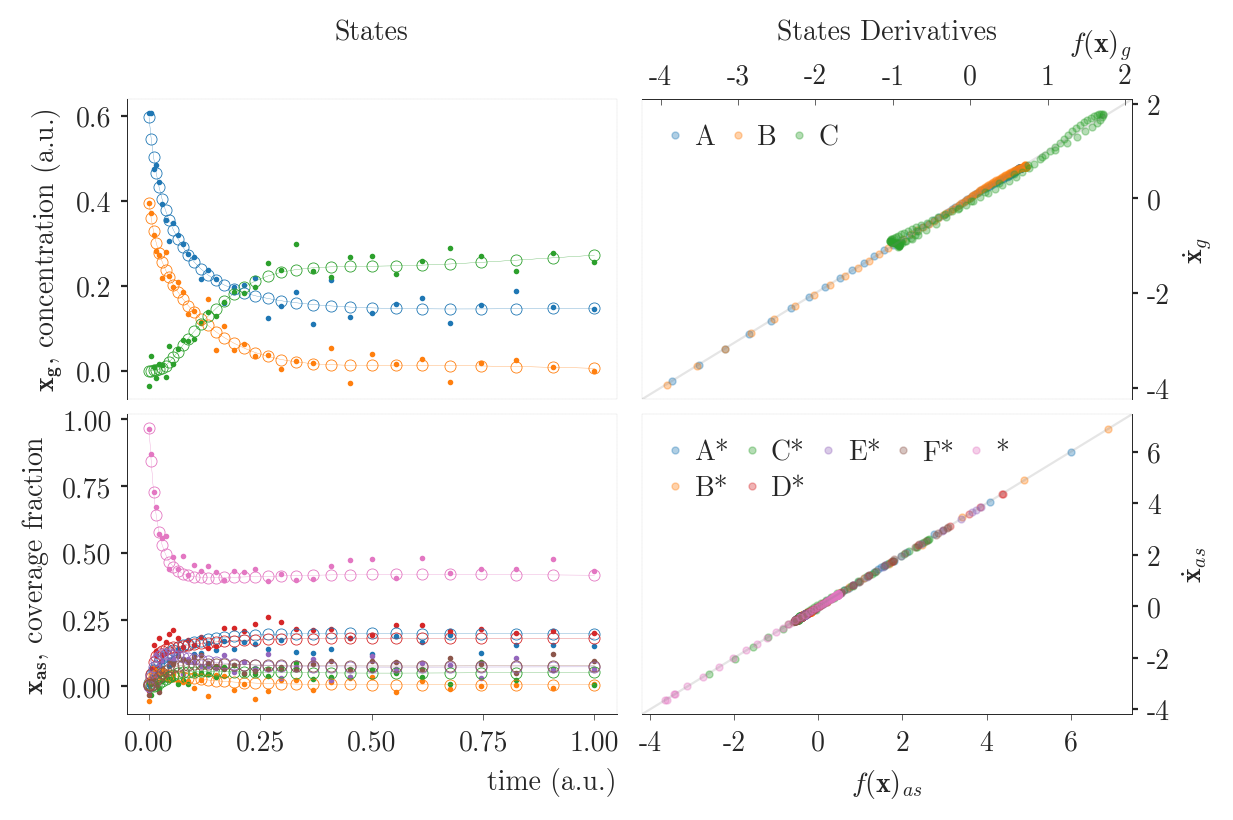

In [30]:
addon = '_alpha13'
mode = 'invvwn'
mkm  = 3
label = 'trainer_{}_{}_alpha13_sim'.format(mode,mkm)
plot = ['state_obs','diff_obs','state_latent','diff_latent']
_p = plot[0]
_bc = 0
d = __results__[label][_bc]
t  = d['data']['t']

mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.major.bottom'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.left'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.major.right'] = True
mpl.rcParams['xtick.major.size'] = 2.
mpl.rcParams['xtick.major.width'] = .25
mpl.rcParams['ytick.major.size'] = 2.

mpl.rcParams.update({'font.family':'CMU Serif'})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'mathtext.fallback_to_cm':True})
mpl.rcParams.update({'font.size':10})
mpl.rcParams.update({'axes.unicode_minus':False})
mpl.rcParams.update({'text.usetex':False})
mpl.rcParams.update({'legend.fontsize': 8.,
          'legend.handlelength': 1})
fs=12.

mpl.rcParams.update({   'figure.titlesize' : fs,
                        })
mpl.rcParams.update({   'axes.titlesize' : fs*10/12.,
                        'axes.labelsize' : fs*10/12.,
                        'lines.linewidth' : 1,
                        'lines.markersize' : fs*10/12.,
                        'xtick.labelsize' : fs*10/12.,
                        'ytick.labelsize' : fs*10/12.})
mpl.rcParams.update({'legend.handletextpad':.4,
                     'legend.handlelength':.6,
                      'legend.columnspacing':.5,
                      'legend.borderaxespad':.5,
                      'legend.fontsize' : fs*10/12.})
mpl.rcParams['axes.linewidth'] = 0.75 #set the value globally

%matplotlib inline

fig = plt.figure(figsize=(7, 7),dpi=200)

# Sizes are in inches.

dx = 2.45
dy = 1.5

horiz = [Size.Fixed(dx), Size.Fixed(0.125)]*2
vert = [Size.Fixed(dy), Size.Fixed(0.075)]*2

rect = (0.01,0.01,0.02,0.02)
# Divide the axes rectangle into a grid with sizes specified by horiz * vert.
divider = Divider(fig, rect, horiz, vert, aspect=False)

# The rect parameter will actually be ignored and overridden by axes_locator.

axs = [[[] for i in range(2)] for j in range(2)]
matching_dict = dict()
delta = 1
for j in range(2):
    for i in range(2):
        axs[j][i] = fig.add_axes(rect, axes_locator=divider.new_locator(nx=i*2, ny=j*2))

ax = axs
    
ls = []
legs = [['A*', 'B*','C*','D*','E*','F*','*'],['A','B','C']]
for i, _p in enumerate([plot[3],plot[1]]):
    try:
        print(i,_p)
        ds0 = d['data'][_p][0]
        ds1 = d['data'][_p][1]
        ds0 , ds1 = [(ds-ds.mean(axis=0))/ds.std(axis=0) for ds in [ds0,ds1]]
        ls = axs[i][1].plot(ds0,ds1,'.',ms=5,mew=0.5,alpha=0.35)
        #leg1 = axs[i][1].legend(iter(ls), legs[i],ncol=5,loc=[0.05,0.75],labelspacing=0.35)
        leg1 = axs[i][1].legend(iter(ls), legs[i],ncol=5,labelspacing=0.35)
        bounds = list(axs[i][1].get_xbound())+list(ax[i][1].get_ybound())
        newbounds = [min(bounds)-0.025,max(bounds)+0.025]
        L = 10
        ax[i][1].plot([-L,L],[-L,L],'-',lw=0.8,alpha=0.2,color='grey')
        ax[i][1].set_xlim(newbounds)
        ax[i][1].set_ylim(newbounds)
    except:
        print('Missing',(i,_p))
    
n = 3
    
i = 1
t_ = t[::n]
l1 = axs[i][0].plot(t_,d['raw_data']['state'][1][::n,:3],'.',ms=2,lw=0.05)
l2 = axs[i][0].plot(t_,d['raw_data']['state'][0][::n,:3],'o-',lw=0.1,ms=4,markerfacecolor='None',markeredgecolor='black',markeredgewidth=0.3)

fix_color(l1,l2)
legs = ['A', 'B','C']
#axs[1][0].legend(iter(l1+l2), legs+[_+'$_{_{NN}}$' for _ in legs],ncol=2,loc=[0.6,0.55],labelspacing=0.5)


t_ = t[::n]
l1 = axs[0][0].plot(t_,d['raw_data']['state'][1][::n,3:],'.',ms=2,lw=0.05)
l2 = axs[0][0].plot(t_,d['raw_data']['state'][0][::n,3:],'o-',lw=0.1,ms=4,markerfacecolor='None',markeredgecolor='black',markeredgewidth=0.3)
fix_color(l1,l2)
legs = ['A*', 'B*','C*','D*','E*','F*','*']
#leg1 = axs[0][0].legend(iter(l1), legs,ncol=4,loc=[0.1,0.75],labelspacing=0.35)
#leg2 = axs[0][0].legend(iter(l2),[_+'$_{_{NN}}$' for _ in legs],ncol=4,loc=[0.1,0.5],labelspacing=0.35,columnspacing=0.35)
#axs[0][0].add_artist(leg1)

axs[0][0].set_xlabel('time (a.u.)',ha='right',x=1.)
axs[1][0].set_ylabel('$\mathbf{x_{g}}$, concentration (a.u.)')
axs[1][0].tick_params(labelbottom=False, labelleft=True)
axs[1][1].tick_params(labelbottom=False, labeltop=True,labelleft=False,labelright=True)
#axs[1][1].set_xlabel('time (a.u.)')
axs[0][0].set_ylabel('$\mathbf{x_{as}}$, coverage fraction')
#axs[0][0].set_xlabel('$f(\mathbf{x})$')
#axs[0][0].set_ylabel('$\mathbf{\.x}$')
axs[1][1].set_xlabel('$f(\mathbf{x})_g$',ha='right',x=1.)
axs[1][1].xaxis.set_label_position('top')
axs[1][1].set_ylabel('$\mathbf{\.x}_g$')
axs[1][1].yaxis.set_label_position("right")
axs[1][1].yaxis.tick_right()
axs[0][1].set_xlabel('$f(\mathbf{x})_{as}$')
axs[0][1].set_ylabel('$\mathbf{\.x}_{as}$')
axs[0][1].yaxis.set_label_position("right")
axs[0][1].yaxis.tick_right()
axs[0][0].set_xlim([-0.05,1.05])

for _ in axs:
    for ax in _:
        [i.set_linewidth(0.35)  for i in ax.spines.values()];
        plt.setp(ax.get_xticklabels(), visible=True)

axs[1][0].spines['bottom'].set_linestyle("dashed")
axs[1][0].spines['bottom'].set_linewidth(0.025)
axs[1][0].spines['top'].set_linestyle("dashed")
axs[1][0].spines['top'].set_linewidth(0.025)
axs[1][0].spines['right'].set_linestyle("dashed")
axs[1][0].spines['right'].set_linewidth(0.025)
axs[0][0].spines['top'].set_linestyle("dashed")
axs[0][0].spines['top'].set_linewidth(0.025)
axs[0][0].spines['right'].set_linestyle("dashed")
axs[0][0].spines['right'].set_linewidth(0.025)
axs[1][0].yaxis.set_ticks_position('left')
axs[1][0].xaxis.set_ticks_position('bottom')
axs[1][0].set_xlim(axs[0][0].get_xlim())
axs[1][0].set_xticks([])
axs[0][0].xaxis.set_ticks_position('bottom')
axs[0][0].yaxis.set_ticks_position('left')
axs[0][0].xaxis.set_label_position('bottom')
axs[0][1].yaxis.set_ticks_position('right')
axs[0][1].xaxis.set_ticks_position('bottom')
axs[1][1].yaxis.set_ticks_position('right')
axs[1][1].xaxis.set_ticks_position('top')
axs[1][1].xaxis.set_label_position('top')
axs[0][1].yaxis.set_ticks_position('right')
axs[0][1].xaxis.set_ticks_position('bottom')
axs[1][1].tick_params(axis='x',direction="in")
axs[1][1].spines['bottom'].set_linestyle("dashed")
axs[1][1].spines['bottom'].set_linewidth(0.025)
axs[1][1].spines['left'].set_linestyle("dashed")
axs[1][1].spines['left'].set_linewidth(0.025)
axs[0][1].spines['top'].set_linestyle("dashed")
axs[0][1].spines['top'].set_linewidth(0.025)
axs[0][1].spines['left'].set_linestyle("dashed")
axs[0][1].spines['left'].set_linewidth(0.025)
axs[1][1].xaxis.set_major_locator(plt.MaxNLocator(8,integer=True))
axs[1][1].yaxis.set_major_locator(plt.MaxNLocator(6,integer=True))
axs[0][1].xaxis.set_major_locator(plt.MaxNLocator(8,integer=True))
axs[0][1].yaxis.set_major_locator(plt.MaxNLocator(6,integer=True))

axs[1][0].text(.5,1.2,'States',
    horizontalalignment='center',
    transform=axs[1][0].transAxes,
    fontsize=10)

axs[1][1].text(.5,1.2,'States Derivatives',
    horizontalalignment='center',
    transform=axs[1][1].transAxes,
    fontsize=10)

plt.savefig('latex_reg/figures/inv_noise_example.pdf',dpi=300,bbox_inches='tight')
plt.savefig('latex_reg/figures/inv_noise_example.svg',dpi=300,bbox_inches='tight')

#### All Summary Plots Generator

0 diff_obs
1 diff_obs
0 diff_obs
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_obs
1 diff_obs
0 diff_obs
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_obs
1 diff_obs
0 diff_obs
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs
0 diff_latent
1 diff_obs


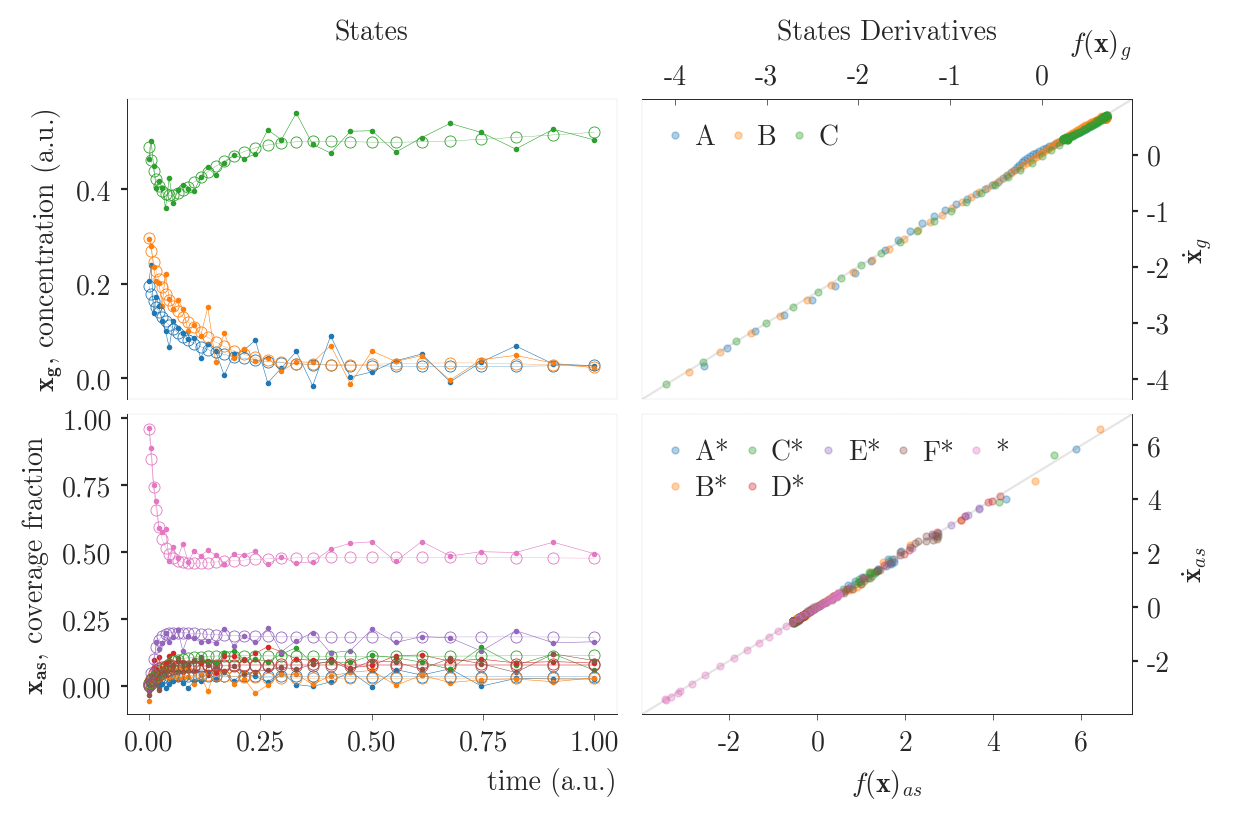

In [31]:
addon = '_alpha13'
for mode in ['inv','invsc','invvwn']:
    for mkm in range(4):
        for _bc in range(2):
            label = 'trainer_{}_{}_alpha13_sim'.format(mode,mkm)
            plot = ['state_obs','diff_obs','state_latent','diff_latent']
            _p = plot[0]
            d = __results__[label][_bc]
            t  = d['data']['t']

            mpl.rcParams['xtick.bottom'] = True
            mpl.rcParams['xtick.major.bottom'] = True
            mpl.rcParams['xtick.top'] = True
            mpl.rcParams['xtick.major.top'] = True
            mpl.rcParams['ytick.right'] = True
            mpl.rcParams['ytick.major.left'] = True
            mpl.rcParams['ytick.left'] = True
            mpl.rcParams['ytick.major.right'] = True
            mpl.rcParams['xtick.major.size'] = 2.
            mpl.rcParams['xtick.major.width'] = .25
            mpl.rcParams['ytick.major.size'] = 2.

            mpl.rcParams.update({'font.family':'CMU Serif'})
            mpl.rcParams.update({'mathtext.fontset':'cm'})
            mpl.rcParams.update({'mathtext.fallback_to_cm':True})
            mpl.rcParams.update({'font.size':10})
            mpl.rcParams.update({'axes.unicode_minus':False})
            mpl.rcParams.update({'text.usetex':False})
            mpl.rcParams.update({'legend.fontsize': 8.,
                      'legend.handlelength': 1})
            fs=12.

            mpl.rcParams.update({   'figure.titlesize' : fs,
                                    })
            mpl.rcParams.update({   'axes.titlesize' : fs*10/12.,
                                    'axes.labelsize' : fs*10/12.,
                                    'lines.linewidth' : 1,
                                    'lines.markersize' : fs*10/12.,
                                    'xtick.labelsize' : fs*10/12.,
                                    'ytick.labelsize' : fs*10/12.})
            mpl.rcParams.update({'legend.handletextpad':.4,
                                 'legend.handlelength':.6,
                                  'legend.columnspacing':.5,
                                  'legend.borderaxespad':.5,
                                  'legend.fontsize' : fs*10/12.})
            mpl.rcParams['axes.linewidth'] = 0.75 #set the value globally

            %matplotlib inline

            if mkm>0:
                fig = plt.figure(figsize=(7, 7),dpi=200)
            else:
                fig = plt.figure(figsize=(7, 7/2.),dpi=200)

            # Sizes are in inches.

            dx = 2.45
            dy = 1.5

            horiz = [Size.Fixed(dx), Size.Fixed(0.125)]*2
            vert = [Size.Fixed(dy), Size.Fixed(0.075)]*(2)

            rect = (0.01,0.01,0.02,0.02)
            # Divide the axes rectangle into a grid with sizes specified by horiz * vert.
            divider = Divider(fig, rect, horiz, vert, aspect=False)

            # The rect parameter will actually be ignored and overridden by axes_locator.
            axs = [[[] for i in range(2)] for j in range(2)]
            matching_dict = dict()
            delta = 1
            for j in range(2):
                for i in range(2):
                    axs[j][i] = fig.add_axes(rect, axes_locator=divider.new_locator(nx=i*2, ny=j*2))

            ax = axs

            ls = []
            legs = [['A*', 'B*','C*','D*','E*','F*','*'],['A','B','C']]
            for i, _p in enumerate([plot[3],plot[1]]) if mkm>0 else enumerate([plot[1],plot[1]]):
                print(i,_p)
                ds0 = d['data'][_p][0]
                ds1 = d['data'][_p][1]
                ds0 , ds1 = [(ds-ds.mean(axis=0))/ds.std(axis=0) for ds in [ds0,ds1]]
                ls = axs[i][1].plot(ds0,ds1,'.',ms=5,mew=0.5,alpha=0.35)
                #leg1 = axs[i][1].legend(iter(ls), legs[i],ncol=5,loc=[0.05,0.75],labelspacing=0.35)
                leg1 = axs[i][1].legend(iter(ls), legs[i],ncol=5,labelspacing=0.35)
                bounds = list(axs[i][1].get_xbound())+list(ax[i][1].get_ybound())
                newbounds = [min(bounds)-0.025,max(bounds)+0.025]
                L = 10
                ax[i][1].plot([-L,L],[-L,L],'-',lw=0.8,alpha=0.2,color='grey')
                ax[i][1].set_xlim(newbounds)
                ax[i][1].set_ylim(newbounds)

            n = 3

            i = 1
            t_ = t[::n]
            l1 = axs[i][0].plot(t_,d['raw_data']['state'][1][::n,:3],'.-',ms=2,lw=0.2)
            l2 = axs[i][0].plot(t_,d['raw_data']['state'][0][::n,:3],'o-',lw=0.1,ms=4,markerfacecolor='None',markeredgecolor='black',markeredgewidth=0.3)

            fix_color(l1,l2)
            legs = ['A', 'B','C']

            t_ = t[::n]
            if mkm>0:
                l1 = axs[0][0].plot(t_,d['raw_data']['state'][1][::n,3:],'.-',ms=2,lw=0.2)
                l2 = axs[0][0].plot(t_,d['raw_data']['state'][0][::n,3:],'o-',lw=0.1,ms=4,markerfacecolor='None',markeredgecolor='black',markeredgewidth=0.3)
            fix_color(l1,l2)
            legs = ['A*', 'B*','C*','D*','E*','F*','*']

            axs[0][0].set_xlabel('time (a.u.)',ha='right',x=1)
            if mkm==0:
                axs[1][0].set_xlabel('time (a.u.)',ha='right',x=1)
            axs[1][0].set_ylabel('$\mathbf{x_{g}}$, concentration (a.u.)')
            axs[1][0].tick_params(labelbottom=False, labelleft=True)
            axs[1][1].tick_params(labelbottom=False, labeltop=True,labelleft=False,labelright=True)

            axs[0][0].set_ylabel('$\mathbf{x_{as}}$, coverage fraction')
            
            if mkm>0:
                axs[1][1].set_xlabel('$f(\mathbf{x})_g$',ha='right',x=1)
            else:
                axs[1][1].set_xlabel('$f(\mathbf{x})_g$')
            axs[1][1].xaxis.set_label_position('top')
            axs[1][1].set_ylabel('$\mathbf{\.x}_g$')
            axs[1][1].yaxis.set_label_position("right")
            axs[1][1].yaxis.tick_right()
            axs[0][1].set_xlabel('$f(\mathbf{x})_{as}$')
            axs[0][1].set_ylabel('$\mathbf{\.x}_{as}$')
            axs[0][1].yaxis.set_label_position("right")
            axs[0][1].yaxis.tick_right()
            axs[0][0].set_xlim([-0.05,1.05])
            
            for _ in axs:
                for ax in _:
                    [i.set_linewidth(0.35)  for i in ax.spines.values()];
                    plt.setp(ax.get_xticklabels(), visible=True)
            
            if mkm>0:
                axs[1][0].spines['bottom'].set_linestyle("dashed")
                axs[1][0].spines['bottom'].set_linewidth(0.025)
                axs[1][0].spines['top'].set_linestyle("dashed")
                axs[1][0].spines['top'].set_linewidth(0.025)
                axs[1][0].spines['right'].set_linestyle("dashed")
                axs[1][0].spines['right'].set_linewidth(0.025)
            else:
                axs[1][0].spines['top'].set_linestyle("dashed")
                axs[1][0].spines['top'].set_linewidth(0.025)
                axs[1][0].spines['right'].set_linestyle("dashed")
                axs[1][0].spines['right'].set_linewidth(0.025)

            axs[0][0].spines['top'].set_linestyle("dashed")
            axs[0][0].spines['top'].set_linewidth(0.025)
            axs[0][0].spines['right'].set_linestyle("dashed")
            axs[0][0].spines['right'].set_linewidth(0.025)


            axs[1][0].yaxis.set_ticks_position('left')
            axs[1][0].xaxis.set_ticks_position('bottom')
            
            axs[1][0].set_xlim(axs[0][0].get_xlim())
            if mkm>0:
                axs[1][0].set_xticks([])

            axs[0][0].xaxis.set_ticks_position('bottom')
            axs[0][0].yaxis.set_ticks_position('left')
            axs[0][0].xaxis.set_label_position('bottom')

            axs[0][1].yaxis.set_ticks_position('right')
            axs[0][1].xaxis.set_ticks_position('bottom')

            axs[1][1].yaxis.set_ticks_position('right')

            if mkm>0:
                axs[1][1].xaxis.set_ticks_position('top')
                axs[1][1].xaxis.set_label_position('top')
            else:
                axs[1][1].xaxis.set_ticks_position('bottom')
                axs[1][1].xaxis.set_label_position('bottom')
            axs[0][1].yaxis.set_ticks_position('right')
            axs[0][1].xaxis.set_ticks_position('bottom')
            if mkm>0:
                axs[1][1].tick_params(axis='x',direction="in")
            
            if mkm>0:
                axs[1][1].spines['bottom'].set_linestyle("dashed")
                axs[1][1].spines['bottom'].set_linewidth(0.025)
            else:
                axs[1][1].spines['top'].set_linestyle("dashed")
                axs[1][1].spines['top'].set_linewidth(0.025)
            
            axs[1][1].spines['left'].set_linestyle("dashed")
            axs[1][1].spines['left'].set_linewidth(0.025)
            axs[0][1].spines['top'].set_linestyle("dashed")
            axs[0][1].spines['top'].set_linewidth(0.025)
            axs[0][1].spines['left'].set_linestyle("dashed")
            axs[0][1].spines['left'].set_linewidth(0.025)
            axs[1][1].xaxis.set_major_locator(plt.MaxNLocator(8,integer=True))
            axs[1][1].yaxis.set_major_locator(plt.MaxNLocator(6,integer=True))
            axs[0][1].xaxis.set_major_locator(plt.MaxNLocator(8,integer=True))
            axs[0][1].yaxis.set_major_locator(plt.MaxNLocator(6,integer=True))

            axs[1][0].text(.5,1.125+(0.075)*(mkm>0),'States',
                horizontalalignment='center',
                transform=axs[1][0].transAxes,
                fontsize=10)

            axs[1][1].text(.5,1.125+(0.075)*(mkm>0),'States Derivatives',
                horizontalalignment='center',
                transform=axs[1][1].transAxes,
                fontsize=10)
            if mkm==0:
                axs[0][0].remove()
                axs[0][1].remove()
        
            plt.savefig('latex_reg/figures/supp_{}_{}_{}.pdf'.format(mode,mkm,_bc),dpi=300,bbox_inches='tight')

#### Parameter Summary model `3`, `inv`, $SQ+n$

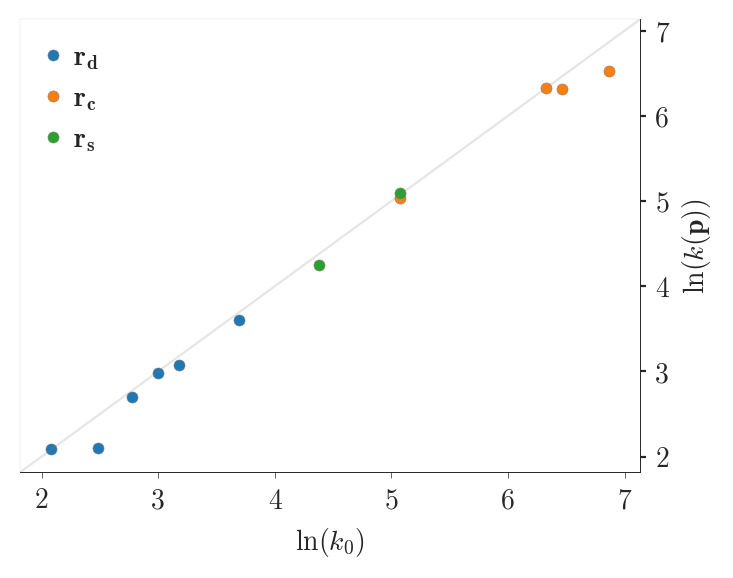

In [35]:
addon = '_alpha13'
mode = 'invvwn'
mkm  = 3
label = 'trainer_{}_{}_alpha13_sim'.format(mode,mkm)
plot = ['state_obs','diff_obs','state_latent','diff_latent']
_p = plot[0]
_bc = 0
d_ =  __results__[label]
d  = d_[_bc]
t  = d['data']['t']
pf = d_['mpars'][-1]
pi = d_['mpars'][0]
p0 = pars[3]['kijnpars']
fig, axs = plt.subplots(1,1,figsize=[4,3],dpi=200)

plt.plot(jnp.log(p0[:6]),pf[0,:6],'.',ms=8,label=r'$\mathbf{r_d}$',mec='grey',mew=0.2)
plt.plot(jnp.log(jnp.concatenate((p0[6:8],p0[-2:]))),jnp.concatenate((pf[0,6:8],pf[0,-2:])),'.',ms=8,label=r'$\mathbf{r_c}$',mec='grey',mew=0.2)
plt.plot(jnp.log(p0[8:10]),pf[0,8:10],'.',ms=8,label=r'$\mathbf{r_s}$',mec='grey',mew=0.2)

plt.legend()

bounds = list(axs.get_xbound())+list(axs.get_ybound())
newbounds = [min(bounds)-0.025,max(bounds)+0.025]
L = 10
axs.plot([-L,L],[-L,L],'-',lw=0.8,alpha=0.2,color='grey')

for _ in [axs]:
    for ax in [_]:
        [i.set_linewidth(0.35)  for i in ax.spines.values()];
        plt.setp(ax.get_xticklabels(), visible=True)

axs.set_xlim(newbounds)
axs.set_ylim(newbounds)
axs.set_ylabel('$\ln(k(\mathbf{p}))$')
axs.set_xlabel('$\ln(k_0)$')
axs.xaxis.set_ticks_position('bottom')
axs.yaxis.set_ticks_position('right')
axs.yaxis.set_label_position('right')
axs.spines['top'].set_linestyle("dashed")
axs.spines['top'].set_linewidth(0.025)
axs.spines['left'].set_linestyle("dashed")
axs.spines['left'].set_linewidth(0.025)
        
plt.savefig('latex_reg/figures/reg_results_noise.pdf',dpi=300,bbox_inches='tight')